# Otimização com Muitos Objetivos por Evolução Diferencial Aplicada ao Escalonamento Dinâmico de Projeto de Software


### QP3. Comparacao com o NSGA-III

In [241]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon, friedmanchisquare
import scikit_posthocs as sp

from dspsp_analysis import metrics_dataset

%matplotlib inline

pd.set_option('display.float_format', '{:.2E}'.format)
pd.options.display.max_columns = 40

data = metrics_dataset(filepath="../hypervolume/metrics-rq3.csv")

dataAcc = metrics_dataset(filepath="../hypervolume/accuracy-rq3.csv", metric="accuracy")
dataStab = metrics_dataset(filepath="../hypervolume/stability-rq3.csv", metric="stability")

alpha = 0.05 # nível de significância

# configuração do gráfico de comparação pareada
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}

In [242]:
def hv_mean(data, instance_id, algorithm_id, grouping="event", metric="hypervolume"):
    df = data[(data.algorithm ==  algorithm_id) & (data.instance == instance_id)]
    df = df.groupby(["instance", "algorithm", grouping], as_index=False)[metric].mean()
    return df


def hv_measures(data, grouping="event", limit=None, metric="hypervolume"):
    instance_ids = list(data.instance.unique())
    algorithm_ids = list(data.algorithm.unique())
    measures = {}
    for inst in instance_ids:
        measures[inst] = {}
        for alg in algorithm_ids:
            measures[inst][alg] = hv_mean(data, inst, alg, grouping, metric)[:limit]
    return measures

def hv_measures_nonzero(data, grouping="event", limit=None):
    instance_ids = list(data.instance.unique())
    algorithm_ids = list(data.algorithm.unique())
    measures = {}
    for inst in instance_ids:
        measures[inst] = {}
        for alg in algorithm_ids:
            mean = hv_mean(data, inst, alg, grouping)[:limit]
            measures[inst][alg] = mean[mean.hypervolume != 0]
    return measures


def mean_hypervolume(data):
    return data.groupby(["instance", "algorithm"], as_index=False)["hypervolume"].agg(['mean', 'std'])

def mean_accuracy(data):
    return data.groupby(["instance", "algorithm"], as_index=False)["accuracy"].agg(['mean', 'std'])

def mean_stability(data):
    return data.groupby(["instance", "algorithm"], as_index=False)["stability"].agg(['mean', 'std'])

def plot_hv(data, inst, algorithms):
    plt.figure(figsize=(8,6))
    plt.title("Instância {} \n{}".format(inst, " x ".join(algorithms)))
    plt.xlabel("Pontos de reescalonamento")
    plt.ylabel("Hipervolume")
    for alg in algorithms:
        plt.plot(data[inst][alg].hypervolume, "-o", markersize=3, lw=.5)
    plt.legend(algorithms, loc="lower right")
    plt.show()
    
def plot_acc(data, inst, algorithms):
    plt.figure(figsize=(8,6))
    plt.title("Instância {} \n{}".format(inst, " x ".join(algorithms)))
    plt.xlabel("Pontos de reescalonamento")
    plt.ylabel("Acurácia")
    for alg in algorithms:
        plt.plot(data[inst][alg].accuracy, "-o", markersize=3, lw=.5)
    plt.legend(algorithms, loc="lower right")
    plt.show()
    
def plot_stab(data, inst, algorithms):
    plt.figure(figsize=(8,6))
    plt.title("Instância {} \n{}".format(inst, " x ".join(algorithms)))
    plt.xlabel("Pontos de reescalonamento")
    plt.ylabel("Estabilidade")
    for alg in algorithms:
        plt.plot(data[inst][alg].stability, "-o", markersize=3, lw=.5)
    plt.legend(algorithms, loc="upper left")
    plt.show()
    

def boxplot_hv(data, inst, algorithms):
    plt.title("Instância {} \n{}".format(inst, " x ".join(algorithms)))
    plt.ylabel("Hipervolume")
    plt.boxplot([data[inst][alg].hypervolume for alg in algorithms], labels=algorithms)
    plt.show()
    

def combined_plot_hv(data, inst, algorithms, ylabel="Hipervolume"):
    
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))
    f.suptitle("Instância {} \n{}".format(inst, " x ".join(algorithms)))

    for alg in algorithms:
        ax1.plot(data[inst][alg].hypervolume, "-o", markersize=3, lw=.5)
    ax1.set_xlabel("Pontos de reescalonamento")
    ax1.set_ylabel(ylabel)
    ax1.legend(algorithms, loc="lower right")

    ax2.yaxis.tick_right()
    ax2.yaxis.set_label_position("right")
    ax2.boxplot([data[inst][alg].hypervolume for alg in algorithms], labels=algorithms)
    ax2.set_ylabel(ylabel)

    f.subplots_adjust(wspace=0.1, top=0.85)
    
def combined_plot_acc(data, inst, algorithms, ylabel="Acurácia"):
    
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))
    f.suptitle("Instância {} \n{}".format(inst, " x ".join(algorithms)))

    for alg in algorithms:
        ax1.plot(data[inst][alg].accuracy, "-o", markersize=3, lw=.5)
    ax1.set_xlabel("Pontos de reescalonamento")
    ax1.set_ylabel(ylabel)
    ax1.legend(algorithms, loc="lower right")

    ax2.yaxis.tick_right()
    ax2.yaxis.set_label_position("right")
    ax2.boxplot([data[inst][alg].accuracy for alg in algorithms], labels=algorithms)
    ax2.set_ylabel(ylabel)

    f.subplots_adjust(wspace=0.1, top=0.85)
    
def combined_plot_stab(data, inst, algorithms, ylabel="Estabilidade"):
    
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))
    f.suptitle("Instância {} \n{}".format(inst, " x ".join(algorithms)))

    for alg in algorithms:
        ax1.plot(data[inst][alg].stability, "-o", markersize=3, lw=.5)
    ax1.set_xlabel("Pontos de reescalonamento")
    ax1.set_ylabel(ylabel)
    ax1.legend(algorithms, loc="lower right")

    ax2.yaxis.tick_right()
    ax2.yaxis.set_label_position("right")
    ax2.boxplot([data[inst][alg].stability for alg in algorithms], labels=algorithms)
    ax2.set_ylabel(ylabel)

    f.subplots_adjust(wspace=0.1, top=0.85)
    

In [243]:
mean_hv = mean_hypervolume(data).reset_index()
mean_hv.pivot(index='algorithm', columns='instance')

mean                           \
instance  ST10_DT10_SE10_DE1_SK4-5 ST10_DT10_SE10_DE1_SK6-7   
algorithm                                                     
CMODESDE                  8.49E-01                 9.12E-01   
NSGAIII                   8.35E-01                 9.12E-01   

                                                             \
instance  ST10_DT10_SE15_DE1_SK4-5 ST10_DT10_SE15_DE1_SK6-7   
algorithm                                                     
CMODESDE                  9.18E-01                 7.71E-01   
NSGAIII                   8.79E-01                 7.70E-01   

                                                           \
instance  ST10_DT10_SE5_DE1_SK4-5 ST10_DT10_SE5_DE1_SK6-7   
algorithm                                                   
CMODESDE                 1.15E+00                8.99E-01   
NSGAIII                  1.18E+00                8.98E-01   

                                                             \
instance  ST20_DT10_SE10_DE1_SK4-5 ST20_DT10_SE10_DE1_SK6-7   
algorithm                                                     
CMODESDE                  9.19E-01                 8.09E-01   
NSGAIII                   8.94E-01                 7.85E-01   

                                                             \
instance  ST20_DT10_SE15_DE1_SK4-5 ST20_DT10_SE15_DE1_SK6-7   
algorithm                                                     
CMODESDE                  8.46E-01                 8.13E-01   
NSGAIII                   8.08E-01                 7.87E-01   

                                                           \
instance  ST20_DT10_SE5_DE1_SK4-5 ST20_DT10_SE5_DE1_SK6-7   
algorithm                                                   
CMODESDE                 8.35E-01                9.19E-01   
NSGAIII                  8.32E-01                9.25E-01   

                                                             \
instance  ST30_DT10_SE10_DE1_SK4-5 ST30_DT10_SE10_DE1_SK6-7   
algorithm                                                     
CMODESDE                  9.15E-01                 8.12E-01   
NSGAIII                   8.81E-01                 7.88E-01   

                                                             \
instance  ST30_DT10_SE15_DE1_SK4-5 ST30_DT10_SE15_DE1_SK6-7   
algorithm                                                     
CMODESDE                  8.47E-01                 8.32E-01   
NSGAIII                   7.98E-01                 8.00E-01   

                                                           \
instance  ST30_DT10_SE5_DE1_SK4-5 ST30_DT10_SE5_DE1_SK6-7   
algorithm                                                   
CMODESDE                 7.16E-01                8.05E-01   
NSGAIII                  7.00E-01                7.68E-01   

                               std                           \
instance  ST10_DT10_SE10_DE1_SK4-5 ST10_DT10_SE10_DE1_SK6-7   
algorithm                                                     
CMODESDE                  3.90E-01                 4.06E-01   
NSGAIII                   3.95E-01                 4.19E-01   

                                                             \
instance  ST10_DT10_SE15_DE1_SK4-5 ST10_DT10_SE15_DE1_SK6-7   
algorithm                                                     
CMODESDE                  3.35E-01                 4.26E-01   
NSGAIII                   3.53E-01                 4.23E-01   

                                                           \
instance  ST10_DT10_SE5_DE1_SK4-5 ST10_DT10_SE5_DE1_SK6-7   
algorithm                                                   
CMODESDE                 3.19E-01                3.88E-01   
NSGAIII                  3.09E-01                3.92E-01   

                                                             \
instance  ST20_DT10_SE10_DE1_SK4-5 ST20_DT10_SE10_DE1_SK6-7   
algorithm                                                     
CMODESDE                  4.37E-01                 4.37E-01   
NSGAIII                   

In [244]:
mean_acc = mean_accuracy(dataAcc).reset_index()
mean_acc.pivot(index='algorithm', columns='instance')

mean                           \
instance  ST10_DT10_SE10_DE1_SK4-5 ST10_DT10_SE10_DE1_SK6-7   
algorithm                                                     
CMODESDE                  7.19E-01                 7.15E-01   
NSGAIII                   7.04E-01                 7.11E-01   

                                                             \
instance  ST10_DT10_SE15_DE1_SK4-5 ST10_DT10_SE15_DE1_SK6-7   
algorithm                                                     
CMODESDE                  7.72E-01                 6.21E-01   
NSGAIII                   7.45E-01                 6.17E-01   

                                                           \
instance  ST10_DT10_SE5_DE1_SK4-5 ST10_DT10_SE5_DE1_SK6-7   
algorithm                                                   
CMODESDE                 8.47E-01                7.08E-01   
NSGAIII                  8.72E-01                7.10E-01   

                                                             \
instance  ST20_DT10_SE10_DE1_SK4-5 ST20_DT10_SE10_DE1_SK6-7   
algorithm                                                     
CMODESDE                  7.45E-01                 7.31E-01   
NSGAIII                   7.30E-01                 7.13E-01   

                                                             \
instance  ST20_DT10_SE15_DE1_SK4-5 ST20_DT10_SE15_DE1_SK6-7   
algorithm                                                     
CMODESDE                  7.35E-01                 7.56E-01   
NSGAIII                   7.10E-01                 7.40E-01   

                                                           \
instance  ST20_DT10_SE5_DE1_SK4-5 ST20_DT10_SE5_DE1_SK6-7   
algorithm                                                   
CMODESDE                 7.37E-01                8.23E-01   
NSGAIII                  7.36E-01                8.26E-01   

                                                             \
instance  ST30_DT10_SE10_DE1_SK4-5 ST30_DT10_SE10_DE1_SK6-7   
algorithm                                                     
CMODESDE                  7.89E-01                 7.34E-01   
NSGAIII                   7.70E-01                 7.19E-01   

                                                             \
instance  ST30_DT10_SE15_DE1_SK4-5 ST30_DT10_SE15_DE1_SK6-7   
algorithm                                                     
CMODESDE                  7.95E-01                 7.51E-01   
NSGAIII                   7.69E-01                 7.29E-01   

                                                           \
instance  ST30_DT10_SE5_DE1_SK4-5 ST30_DT10_SE5_DE1_SK6-7   
algorithm                                                   
CMODESDE                 6.69E-01                7.60E-01   
NSGAIII                  6.66E-01                7.40E-01   

                               std                           \
instance  ST10_DT10_SE10_DE1_SK4-5 ST10_DT10_SE10_DE1_SK6-7   
algorithm                                                     
CMODESDE                  2.63E-01                 2.75E-01   
NSGAIII                   2.70E-01                 2.86E-01   

                                                             \
instance  ST10_DT10_SE15_DE1_SK4-5 ST10_DT10_SE15_DE1_SK6-7   
algorithm                                                     
CMODESDE                  2.12E-01                 2.89E-01   
NSGAIII                   2.32E-01                 2.88E-01   

                                                           \
instance  ST10_DT10_SE5_DE1_SK4-5 ST10_DT10_SE5_DE1_SK6-7   
algorithm                                                   
CMODESDE                 1.77E-01                2.52E-01   
NSGAIII                  1.61E-01                2.57E-01   

                                                             \
instance  ST20_DT10_SE10_DE1_SK4-5 ST20_DT10_SE10_DE1_SK6-7   
algorithm                                                     
CMODESDE                  2.78E-01                 2.80E-01   
NSGAIII                   

In [245]:
mean_stab = mean_stability(dataStab).reset_index()
mean_stab.pivot(index='algorithm', columns='instance')

mean                           \
instance  ST10_DT10_SE10_DE1_SK4-5 ST10_DT10_SE10_DE1_SK6-7   
algorithm                                                     
CMODESDE                  4.13E-02                 7.41E-02   
NSGAIII                   5.28E-02                 7.71E-02   

                                                             \
instance  ST10_DT10_SE15_DE1_SK4-5 ST10_DT10_SE15_DE1_SK6-7   
algorithm                                                     
CMODESDE                  7.83E-02                 5.84E-02   
NSGAIII                   4.67E-02                 6.38E-02   

                                                           \
instance  ST10_DT10_SE5_DE1_SK4-5 ST10_DT10_SE5_DE1_SK6-7   
algorithm                                                   
CMODESDE                 7.45E-02                7.28E-02   
NSGAIII                  1.11E-01                6.18E-02   

                                                             \
instance  ST20_DT10_SE10_DE1_SK4-5 ST20_DT10_SE10_DE1_SK6-7   
algorithm                                                     
CMODESDE                  4.48E-02                 5.72E-02   
NSGAIII                   7.31E-02                 7.50E-02   

                                                             \
instance  ST20_DT10_SE15_DE1_SK4-5 ST20_DT10_SE15_DE1_SK6-7   
algorithm                                                     
CMODESDE                  6.30E-02                 4.98E-02   
NSGAIII                   6.72E-02                 7.04E-02   

                                                           \
instance  ST20_DT10_SE5_DE1_SK4-5 ST20_DT10_SE5_DE1_SK6-7   
algorithm                                                   
CMODESDE                 8.50E-02                7.95E-02   
NSGAIII                  7.68E-02                6.80E-02   

                                                             \
instance  ST30_DT10_SE10_DE1_SK4-5 ST30_DT10_SE10_DE1_SK6-7   
algorithm                                                     
CMODESDE                  5.69E-02                 6.49E-02   
NSGAIII                   7.34E-02                 7.80E-02   

                                                             \
instance  ST30_DT10_SE15_DE1_SK4-5 ST30_DT10_SE15_DE1_SK6-7   
algorithm                                                     
CMODESDE                  9.43E-02                 6.46E-02   
NSGAIII                   7.86E-02                 6.04E-02   

                                                           \
instance  ST30_DT10_SE5_DE1_SK4-5 ST30_DT10_SE5_DE1_SK6-7   
algorithm                                                   
CMODESDE                 5.86E-02                7.01E-02   
NSGAIII                  6.35E-02                7.61E-02   

                               std                           \
instance  ST10_DT10_SE10_DE1_SK4-5 ST10_DT10_SE10_DE1_SK6-7   
algorithm                                                     
CMODESDE                  2.09E-01                 5.88E-01   
NSGAIII                   2.94E-01                 6.02E-01   

                                                             \
instance  ST10_DT10_SE15_DE1_SK4-5 ST10_DT10_SE15_DE1_SK6-7   
algorithm                                                     
CMODESDE                  6.17E-01                 4.85E-01   
NSGAIII                   2.20E-01                 4.98E-01   

                                                           \
instance  ST10_DT10_SE5_DE1_SK4-5 ST10_DT10_SE5_DE1_SK6-7   
algorithm                                                   
CMODESDE                 5.81E-01                4.55E-01   
NSGAIII                  7.61E-01                4.00E-01   

                                                             \
instance  ST20_DT10_SE10_DE1_SK4-5 ST20_DT10_SE10_DE1_SK6-7   
algorithm                                                     
CMODESDE                  3.57E-01                 4.10E-01   
NSGAIII                   

In [246]:
hv_execution = hv_measures(data, grouping="execution")
hv_event = hv_measures(data, limit=60)

acc_execution = hv_measures(dataAcc, grouping="execution", metric="accuracy")
acc_event = hv_measures(dataAcc, limit=60, metric="accuracy")

stab_execution = hv_measures(dataStab, grouping="execution", metric="stability")
stab_event = hv_measures(dataStab, limit=59, metric="stability")

## Comparação entre os algoritmos SEM o uso de estratégias dinâmicas

### Instância ST10_DT10_SE5_DE1_SK4-5

None

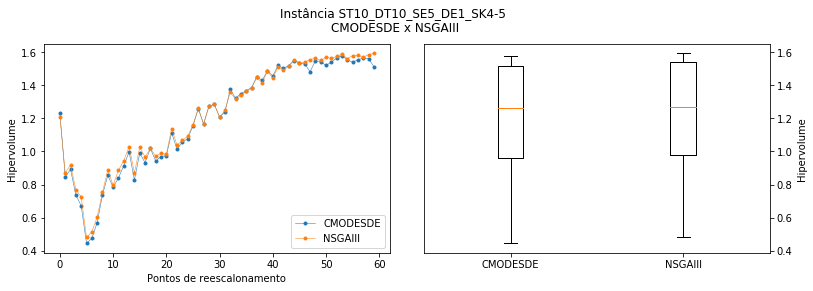

In [247]:
inst = "ST10_DT10_SE5_DE1_SK4-5"
algorithms = ["CMODESDE", "NSGAIII"]    

datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]
datasetsAcc = [acc_event[inst][alg].accuracy for alg in algorithms]
datasetsStab = [stab_event[inst][alg].stability for alg in algorithms]

display(combined_plot_hv(hv_event, inst, algorithms))

None

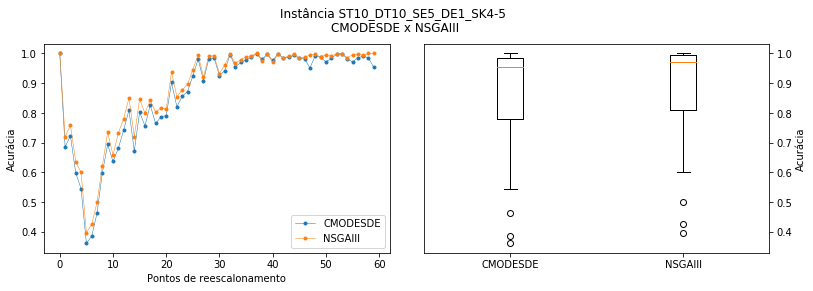

In [248]:
display(combined_plot_acc(acc_event, inst, algorithms))

None

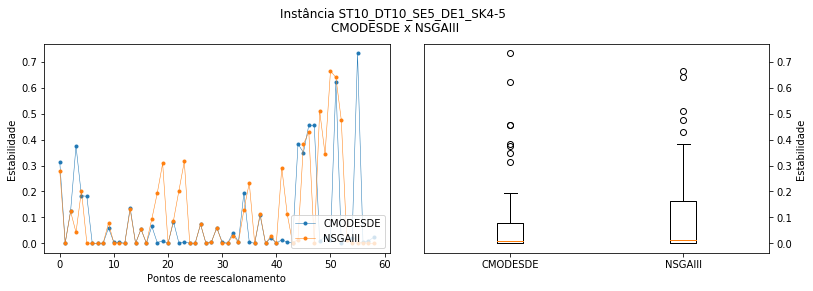

In [249]:
display(combined_plot_stab(stab_event, inst, algorithms))

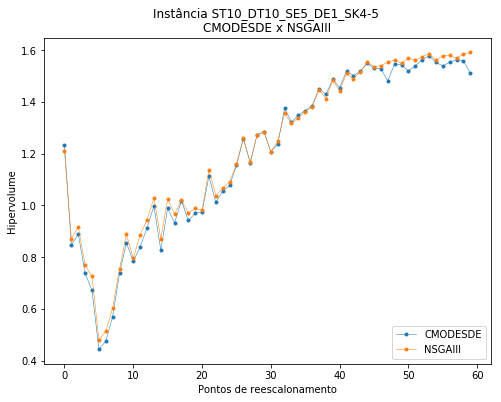

In [250]:
plot_hv(hv_event, inst, algorithms)


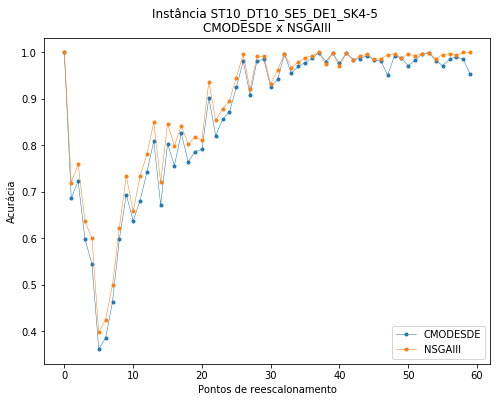

In [251]:
plot_acc(acc_event, inst, algorithms)


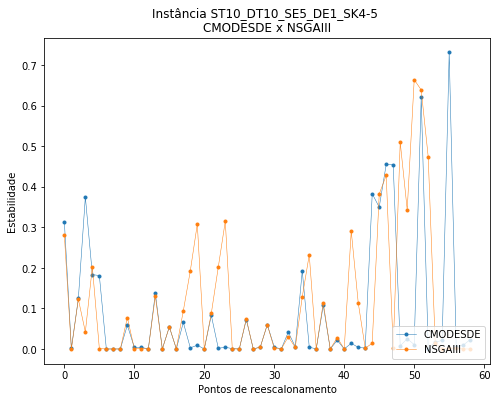

In [252]:
plot_stab(stab_event, inst, algorithms)

In [253]:
#print(*datasets)
stat, p = wilcoxon(*datasets) #friedmanchisquare(*datasets)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')


Statistics=262.000, p=1.531149E-06
Distribuições diferentes (rejeitar H0)


In [254]:
#print(*datasetsAcc)
stat, p = wilcoxon(*datasetsAcc) #friedmanchisquare(*datasetsAcc)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=51.000, p=3.073762E-10
Distribuições diferentes (rejeitar H0)


In [255]:
#print(*datasetsStab)
stat, p = wilcoxon(*datasetsStab) #friedmanchisquare(*datasetsStab)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=532.000, p=5.657198E-01
Mesmas distribuições (falhou em rejeitar H0)


In [256]:
df = pd.DataFrame({alg: hv_event[inst][alg].hypervolume for alg in algorithms})
df = df.melt(var_name="algorithm", value_name="hypervolume")
pc = sp.posthoc_conover(df, group_col="algorithm", val_col="hypervolume")
pc

CMODESDE   NSGAIII
CMODESDE -1.00E+00  5.69E-01
NSGAIII   5.69E-01 -1.00E+00

(<matplotlib.axes._subplots.AxesSubplot at 0x7f1c069de5c0>,
 <matplotlib.colorbar.ColorbarBase at 0x7f1c068bc5f8>)

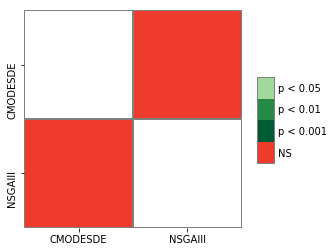

In [257]:
sp.sign_plot(pc, **heatmap_args)

### Instância ST10_DT10_SE10_DE1_SK4-5

None

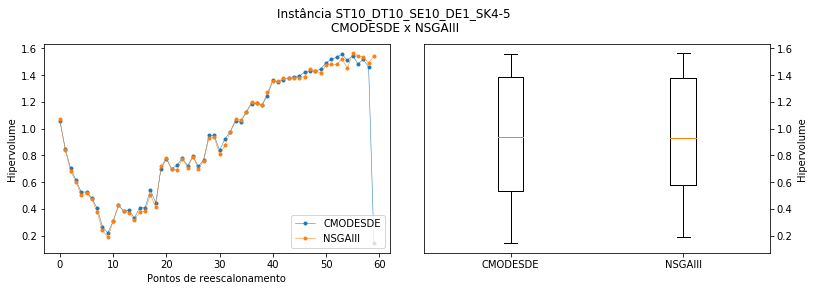

In [258]:
inst = "ST10_DT10_SE10_DE1_SK4-5"
algorithms = ["CMODESDE", "NSGAIII"]    

datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]
datasetsAcc = [acc_event[inst][alg].accuracy for alg in algorithms]
datasetsStab = [stab_event[inst][alg].stability for alg in algorithms]

display(combined_plot_hv(hv_event, inst, algorithms))

None

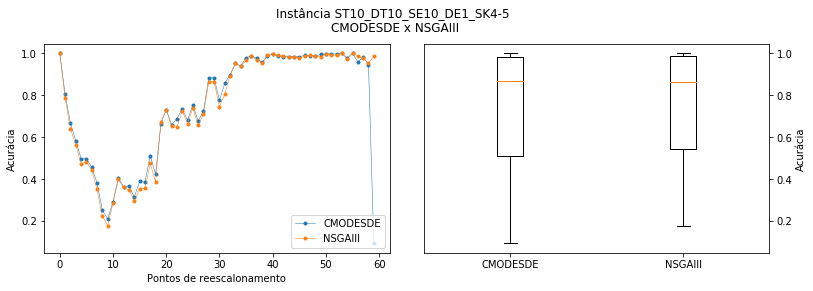

In [259]:
display(combined_plot_acc(acc_event, inst, algorithms))

None

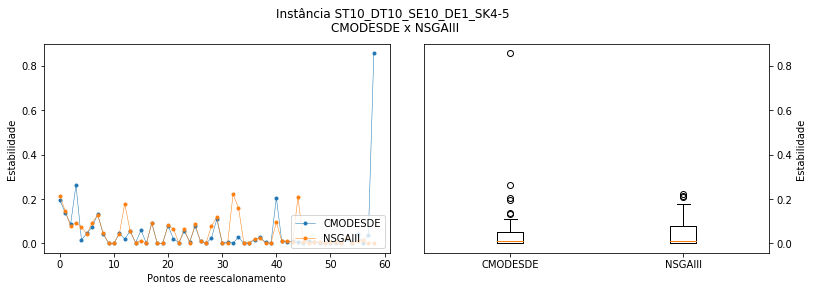

In [260]:
display(combined_plot_stab(stab_event, inst, algorithms))

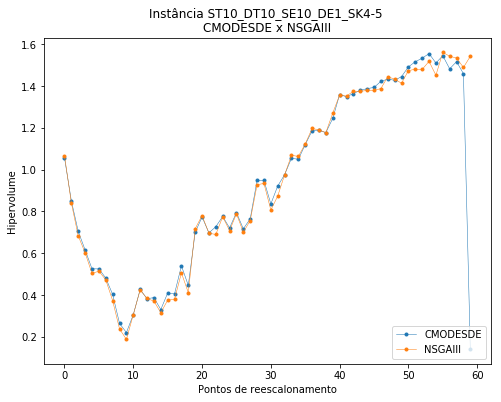

In [261]:
plot_hv(hv_event, inst, algorithms)


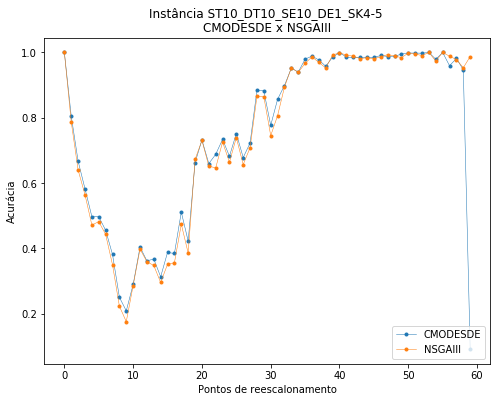

In [262]:
plot_acc(acc_event, inst, algorithms)


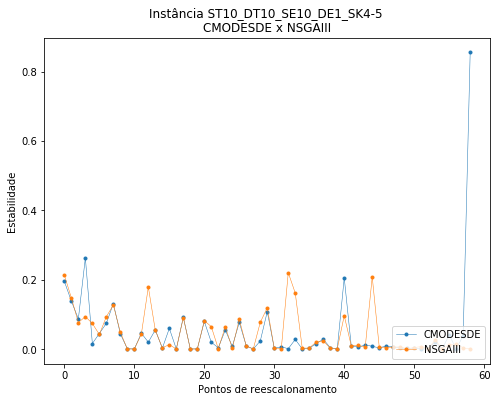

In [263]:
plot_stab(stab_event, inst, algorithms)

In [264]:
stat, p = wilcoxon(*datasets) #friedmanchisquare(*datasets)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')


Statistics=519.000, p=3.554666E-03
Distribuições diferentes (rejeitar H0)


In [265]:
stat, p = wilcoxon(*datasetsAcc) #friedmanchisquare(*datasetsAcc)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=244.000, p=3.690648E-06
Distribuições diferentes (rejeitar H0)


In [266]:
stat, p = wilcoxon(*datasetsStab) #friedmanchisquare(*datasetsStab)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=604.000, p=3.236018E-01
Mesmas distribuições (falhou em rejeitar H0)


In [267]:
df = pd.DataFrame({alg: hv_event[inst][alg].hypervolume for alg in algorithms})
df = df.melt(var_name="algorithm", value_name="hypervolume")
pc = sp.posthoc_conover(df, group_col="algorithm", val_col="hypervolume")
pc

CMODESDE   NSGAIII
CMODESDE -1.00E+00  9.29E-01
NSGAIII   9.29E-01 -1.00E+00

(<matplotlib.axes._subplots.AxesSubplot at 0x7f1c0706cba8>,
 <matplotlib.colorbar.ColorbarBase at 0x7f1c068ecf60>)

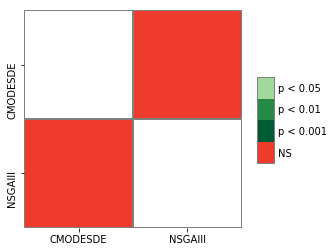

In [268]:
sp.sign_plot(pc, **heatmap_args)

### Instância ST10_DT10_SE15_DE1_SK4-5

In [269]:
hv_execution = hv_measures(data, grouping="execution")
hv_event = hv_measures(data, limit=48)

acc_execution = hv_measures(dataAcc, grouping="execution", metric="accuracy")
acc_event = hv_measures(dataAcc, limit=48, metric="accuracy")

stab_execution = hv_measures(dataStab, grouping="execution", metric="stability")
stab_event = hv_measures(dataStab, limit=47, metric="stability")

None

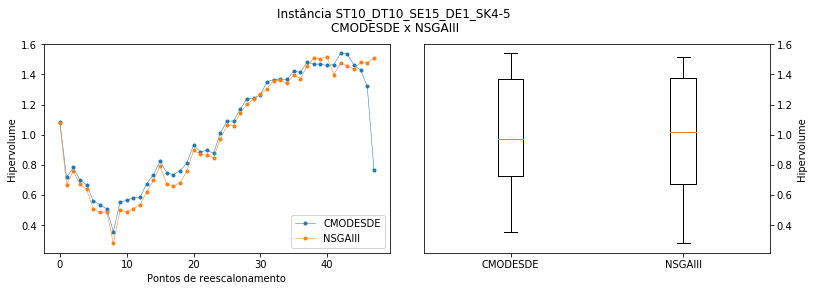

In [270]:
inst = "ST10_DT10_SE15_DE1_SK4-5"
algorithms = ["CMODESDE", "NSGAIII"] #49, 48   

datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]
datasetsAcc = [acc_event[inst][alg].accuracy for alg in algorithms]
datasetsStab = [stab_event[inst][alg].stability for alg in algorithms]

display(combined_plot_hv(hv_event, inst, algorithms))

trashComment='''
#print(datasets)
#np.delete(datasets[0], 48, 0)
aux = datasets[0][:]
del aux[48]
datasets[0] = aux

auxAcc = datasetsAcc[0][:]
del auxAcc[48]
datasetsAcc[0] = auxAcc

#print(datasetsStab)
auxStab = datasetsStab[0][:]
del auxStab[47]
datasetsStab[0] = auxStab
#print(datasets)
'''

None

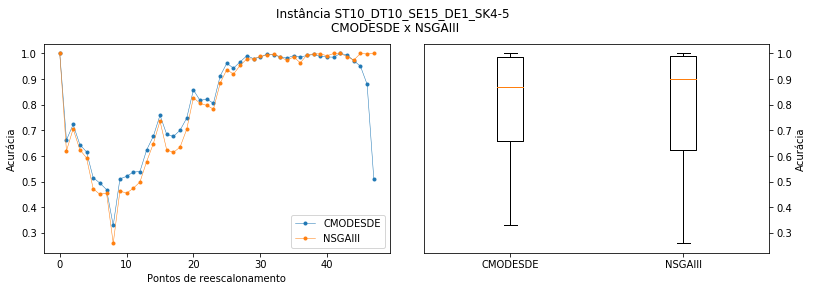

In [271]:
display(combined_plot_acc(acc_event, inst, algorithms))

None

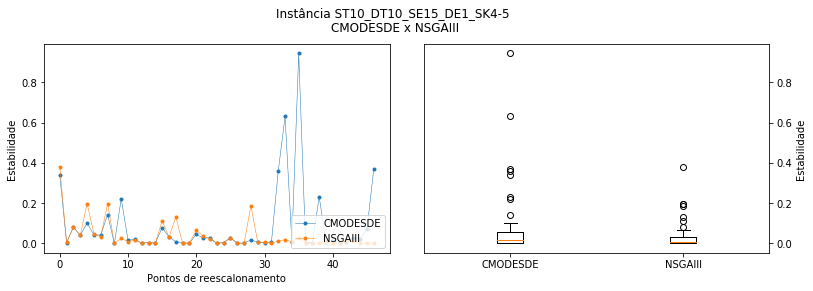

In [272]:
display(combined_plot_stab(stab_event, inst, algorithms))

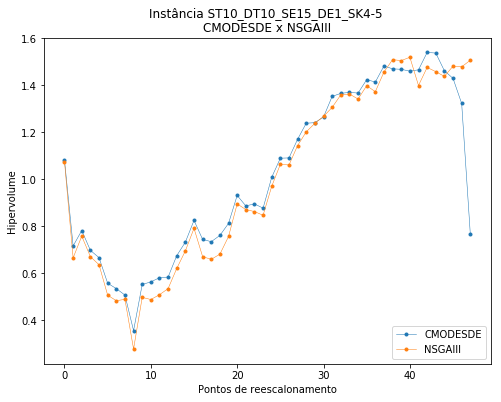

In [273]:
plot_hv(hv_event, inst, algorithms)


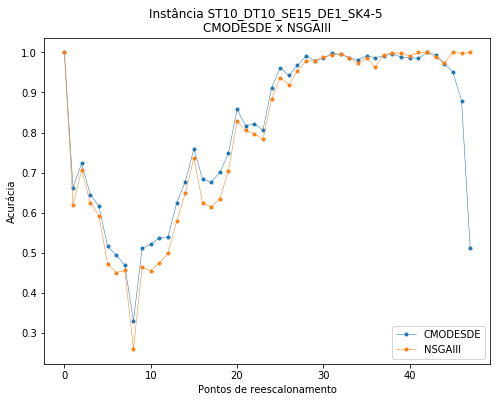

In [274]:
plot_acc(acc_event, inst, algorithms)


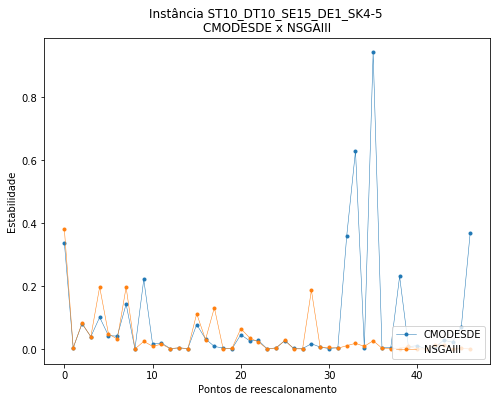

In [275]:
plot_stab(stab_event, inst, algorithms)

In [276]:
stat, p = wilcoxon(*datasets) #friedmanchisquare(*datasets)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')


Statistics=215.000, p=1.304056E-04
Distribuições diferentes (rejeitar H0)


In [277]:
stat, p = wilcoxon(*datasetsAcc) #friedmanchisquare(*datasetsAcc)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=194.000, p=1.533123E-04
Distribuições diferentes (rejeitar H0)


In [278]:
stat, p = wilcoxon(*datasetsStab) #friedmanchisquare(*datasetsStab)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=404.000, p=2.882413E-01
Mesmas distribuições (falhou em rejeitar H0)


In [279]:
df = pd.DataFrame({alg: hv_event[inst][alg].hypervolume for alg in algorithms})
df = df.melt(var_name="algorithm", value_name="hypervolume")
pc = sp.posthoc_conover(df, group_col="algorithm", val_col="hypervolume")
pc

CMODESDE   NSGAIII
CMODESDE -1.00E+00  7.66E-01
NSGAIII   7.66E-01 -1.00E+00

(<matplotlib.axes._subplots.AxesSubplot at 0x7f1c06db0be0>,
 <matplotlib.colorbar.ColorbarBase at 0x7f1c13186978>)

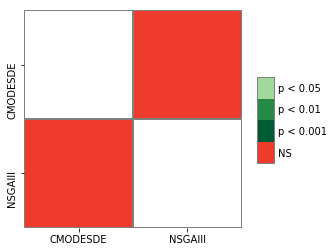

In [280]:
sp.sign_plot(pc, **heatmap_args)

In [281]:
hv_execution = hv_measures(data, grouping="execution")
hv_event = hv_measures(data, limit=60)

acc_execution = hv_measures(dataAcc, grouping="execution", metric="accuracy")
acc_event = hv_measures(dataAcc, limit=60, metric="accuracy")

stab_execution = hv_measures(dataStab, grouping="execution", metric="stability")
stab_event = hv_measures(dataStab, limit=59, metric="stability")

### Instância ST10_DT10_SE5_DE1_SK6-7

None

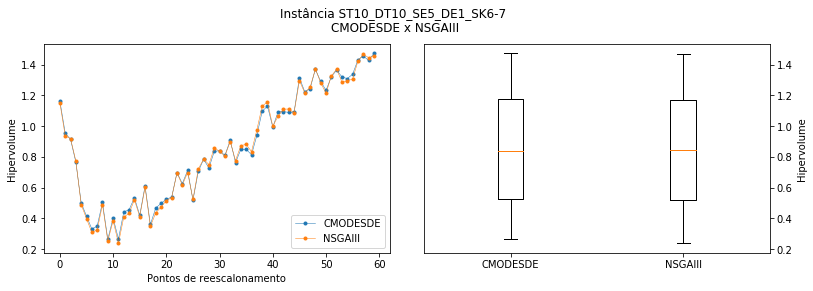

In [282]:
inst = "ST10_DT10_SE5_DE1_SK6-7"
algorithms = ["CMODESDE", "NSGAIII"]    

datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]
datasetsAcc = [acc_event[inst][alg].accuracy for alg in algorithms]
datasetsStab = [stab_event[inst][alg].stability for alg in algorithms]

display(combined_plot_hv(hv_event, inst, algorithms))

None

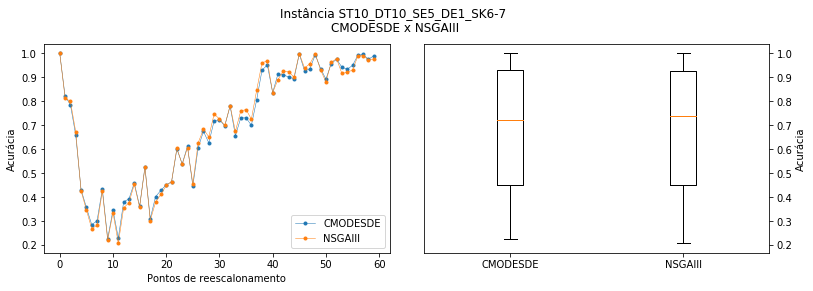

In [283]:
display(combined_plot_acc(acc_event, inst, algorithms))

None

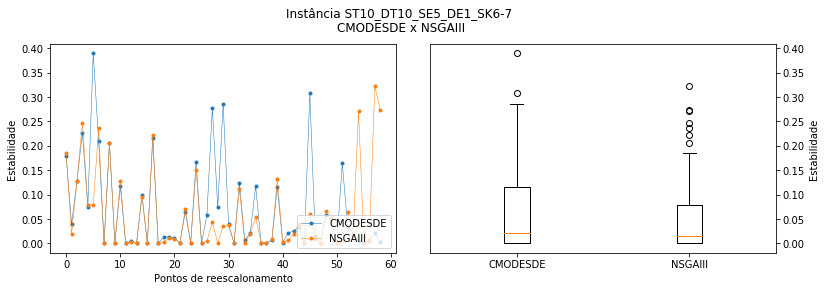

In [284]:
display(combined_plot_stab(stab_event, inst, algorithms))

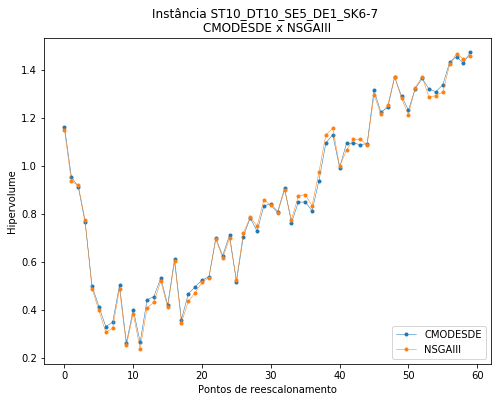

In [285]:
plot_hv(hv_event, inst, algorithms)


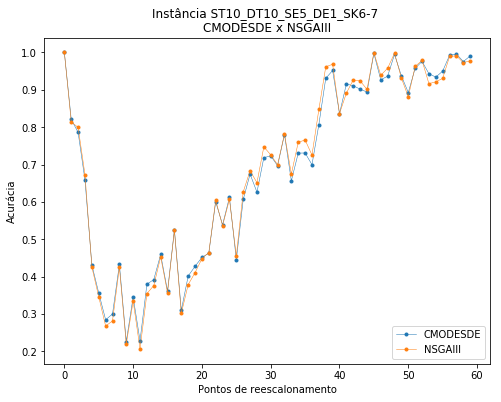

In [286]:
plot_acc(acc_event, inst, algorithms)


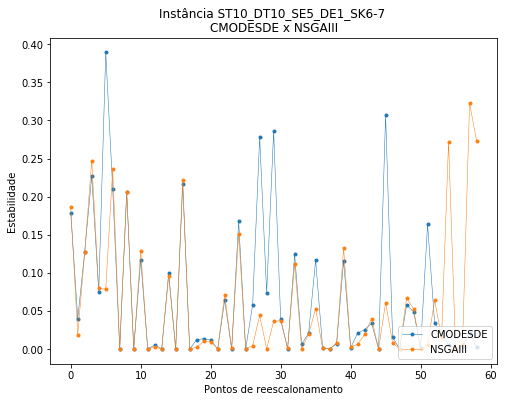

In [287]:
plot_stab(stab_event, inst, algorithms)

In [288]:
stat, p = wilcoxon(*datasets) #friedmanchisquare(*datasets)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')


Statistics=684.000, p=8.903122E-02
Mesmas distribuições (falhou em rejeitar H0)


In [289]:
stat, p = wilcoxon(*datasetsAcc) #friedmanchisquare(*datasetsAcc)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=865.000, p=8.800076E-01
Mesmas distribuições (falhou em rejeitar H0)


In [290]:
stat, p = wilcoxon(*datasetsStab) #friedmanchisquare(*datasetsStab)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=500.000, p=3.667510E-01
Mesmas distribuições (falhou em rejeitar H0)


In [291]:
df = pd.DataFrame({alg: hv_event[inst][alg].hypervolume for alg in algorithms})
df = df.melt(var_name="algorithm", value_name="hypervolume")
pc = sp.posthoc_conover(df, group_col="algorithm", val_col="hypervolume")
pc

CMODESDE   NSGAIII
CMODESDE -1.00E+00  9.00E-01
NSGAIII   9.00E-01 -1.00E+00

(<matplotlib.axes._subplots.AxesSubplot at 0x7f1c06700ba8>,
 <matplotlib.colorbar.ColorbarBase at 0x7f1c067cc7b8>)

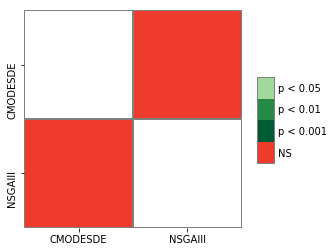

In [292]:
sp.sign_plot(pc, **heatmap_args)

### Instância ST10_DT10_SE10_DE1_SK6-7

None

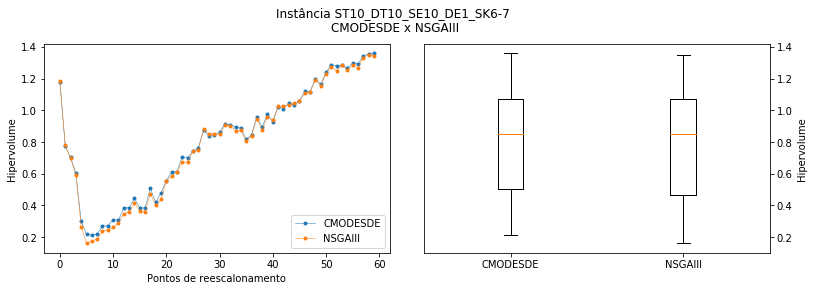

In [293]:
inst = "ST10_DT10_SE10_DE1_SK6-7"
algorithms = ["CMODESDE", "NSGAIII"]    

datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]
datasetsAcc = [acc_event[inst][alg].accuracy for alg in algorithms]
datasetsStab = [stab_event[inst][alg].stability for alg in algorithms]

display(combined_plot_hv(hv_event, inst, algorithms))

None

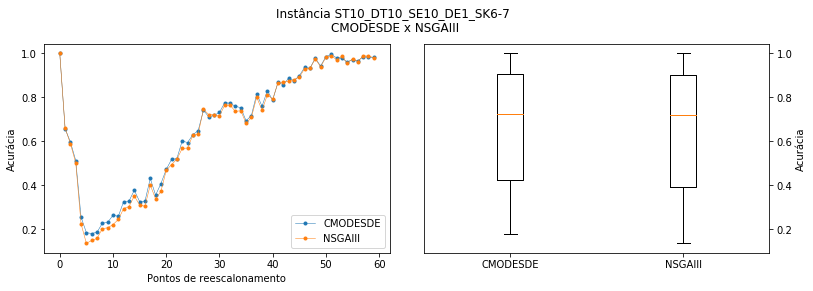

In [294]:
display(combined_plot_acc(acc_event, inst, algorithms))

None

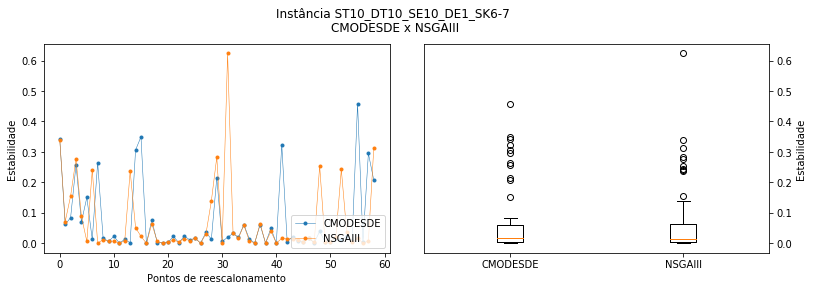

In [295]:
display(combined_plot_stab(stab_event, inst, algorithms))

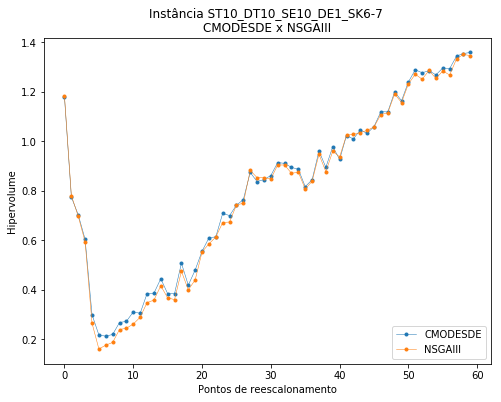

In [296]:
plot_hv(hv_event, inst, algorithms)


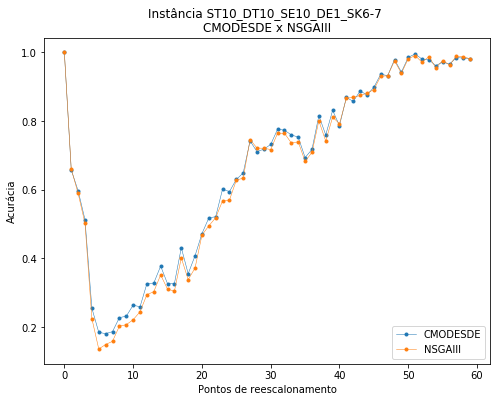

In [297]:
plot_acc(acc_event, inst, algorithms)


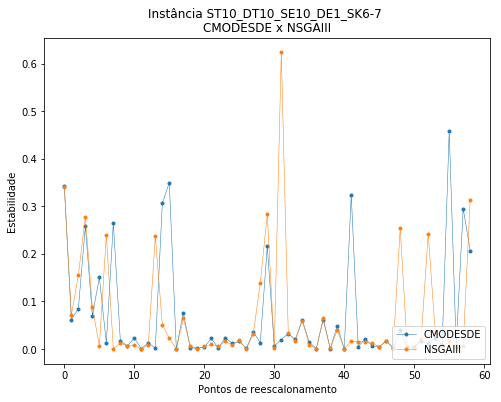

In [298]:
plot_stab(stab_event, inst, algorithms)

In [299]:
stat, p = wilcoxon(*datasets) #friedmanchisquare(*datasets)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')


Statistics=184.000, p=7.393677E-08
Distribuições diferentes (rejeitar H0)


In [300]:
stat, p = wilcoxon(*datasetsAcc) #friedmanchisquare(*datasetsAcc)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=189.000, p=1.493238E-07
Distribuições diferentes (rejeitar H0)


In [301]:
stat, p = wilcoxon(*datasetsStab) #friedmanchisquare(*datasetsStab)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=821.000, p=7.893837E-01
Mesmas distribuições (falhou em rejeitar H0)


In [302]:
df = pd.DataFrame({alg: hv_event[inst][alg].hypervolume for alg in algorithms})
df = df.melt(var_name="algorithm", value_name="hypervolume")
pc = sp.posthoc_conover(df, group_col="algorithm", val_col="hypervolume")
pc

CMODESDE   NSGAIII
CMODESDE -1.00E+00  7.62E-01
NSGAIII   7.62E-01 -1.00E+00

(<matplotlib.axes._subplots.AxesSubplot at 0x7f1c06f14cf8>,
 <matplotlib.colorbar.ColorbarBase at 0x7f1c067464a8>)

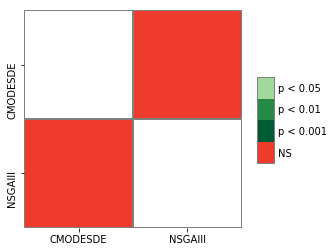

In [303]:
sp.sign_plot(pc, **heatmap_args)

### Instância ST10_DT10_SE15_DE1_SK6-7

None

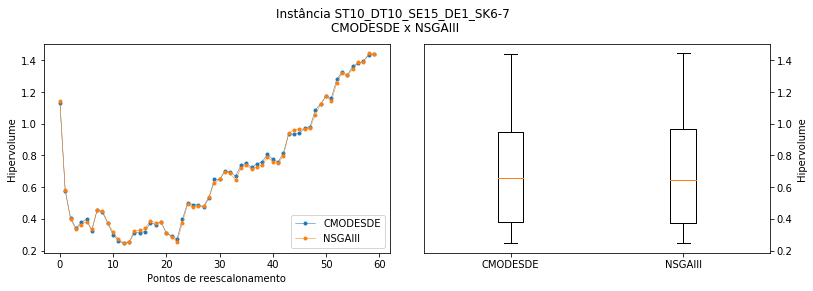

In [304]:
inst = "ST10_DT10_SE15_DE1_SK6-7"
algorithms = ["CMODESDE", "NSGAIII"]    

datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]
datasetsAcc = [acc_event[inst][alg].accuracy for alg in algorithms]
datasetsStab = [stab_event[inst][alg].stability for alg in algorithms]

display(combined_plot_hv(hv_event, inst, algorithms))

None

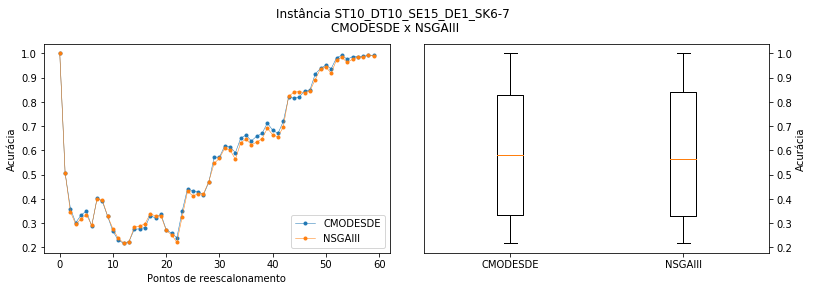

In [305]:
display(combined_plot_acc(acc_event, inst, algorithms))

None

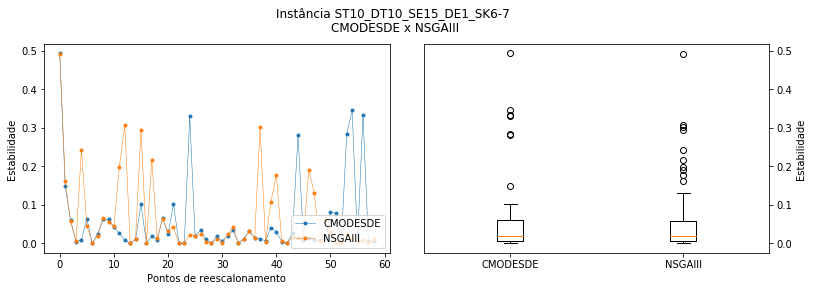

In [306]:
display(combined_plot_stab(stab_event, inst, algorithms))

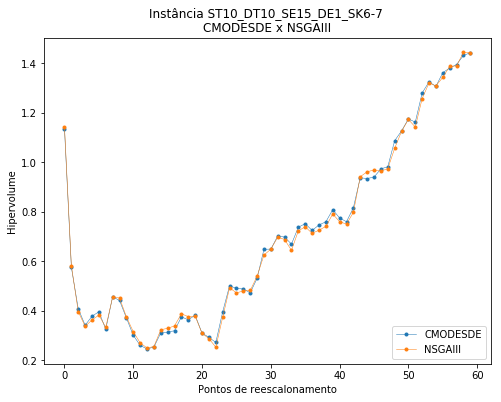

In [307]:
plot_hv(hv_event, inst, algorithms)


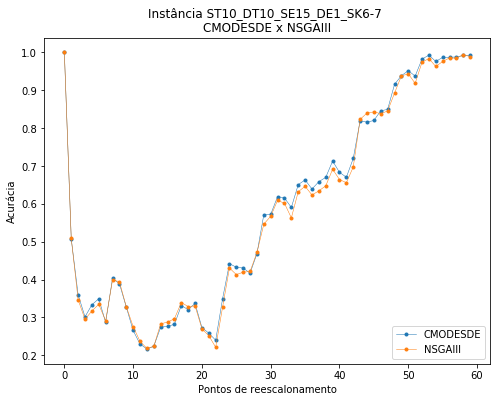

In [308]:
plot_acc(acc_event, inst, algorithms)


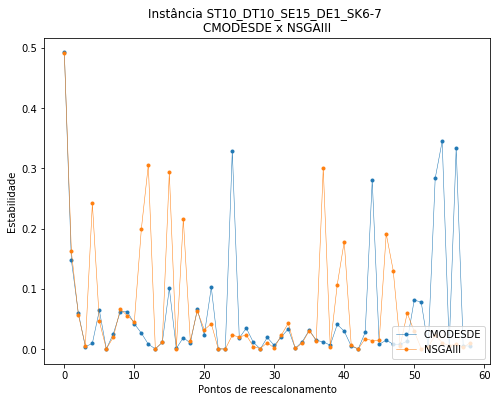

In [309]:
plot_stab(stab_event, inst, algorithms)

In [310]:
stat, p = wilcoxon(*datasets) #friedmanchisquare(*datasets)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')


Statistics=643.000, p=4.524646E-02
Distribuições diferentes (rejeitar H0)


In [311]:
stat, p = wilcoxon(*datasetsAcc) #friedmanchisquare(*datasetsAcc)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=404.000, p=2.827889E-04
Distribuições diferentes (rejeitar H0)


In [312]:
stat, p = wilcoxon(*datasetsStab) #friedmanchisquare(*datasetsStab)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=848.000, p=9.536948E-01
Mesmas distribuições (falhou em rejeitar H0)


In [313]:
df = pd.DataFrame({alg: hv_event[inst][alg].hypervolume for alg in algorithms})
df = df.melt(var_name="algorithm", value_name="hypervolume")
pc = sp.posthoc_conover(df, group_col="algorithm", val_col="hypervolume")
pc

CMODESDE   NSGAIII
CMODESDE -1.00E+00  9.54E-01
NSGAIII   9.54E-01 -1.00E+00

(<matplotlib.axes._subplots.AxesSubplot at 0x7f1c065c3c50>,
 <matplotlib.colorbar.ColorbarBase at 0x7f1c065113c8>)

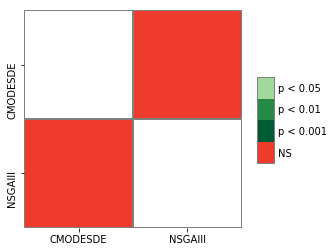

In [314]:
sp.sign_plot(pc, **heatmap_args)

### Instância ST20_DT10_SE5_DE1_SK4-5

None

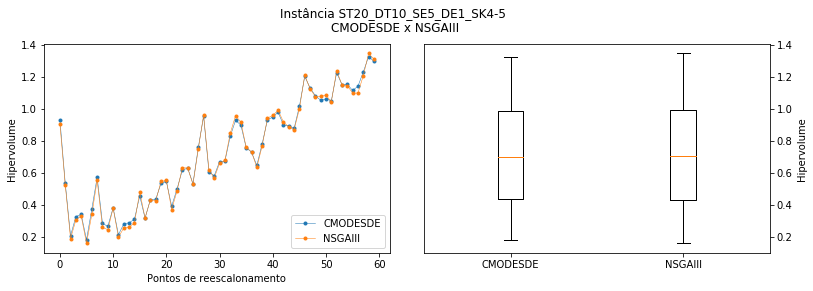

In [315]:
inst = "ST20_DT10_SE5_DE1_SK4-5"
algorithms = ["CMODESDE", "NSGAIII"]    

datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]
datasetsAcc = [acc_event[inst][alg].accuracy for alg in algorithms]
datasetsStab = [stab_event[inst][alg].stability for alg in algorithms]

display(combined_plot_hv(hv_event, inst, algorithms))

None

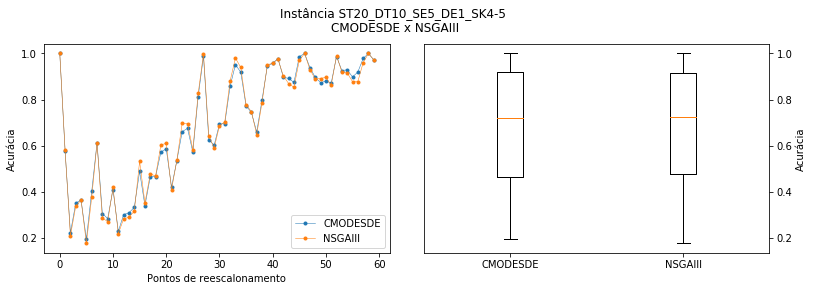

In [316]:
display(combined_plot_acc(acc_event, inst, algorithms))

None

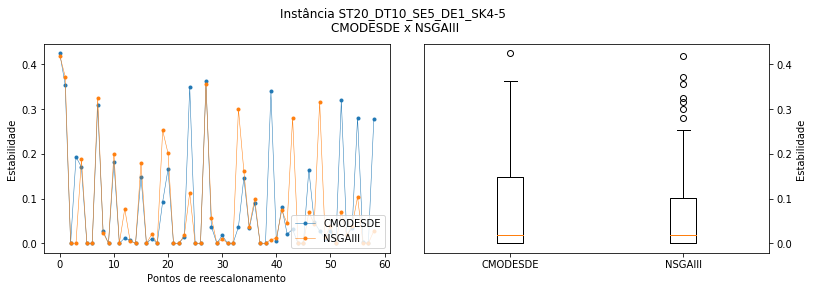

In [317]:
display(combined_plot_stab(stab_event, inst, algorithms))

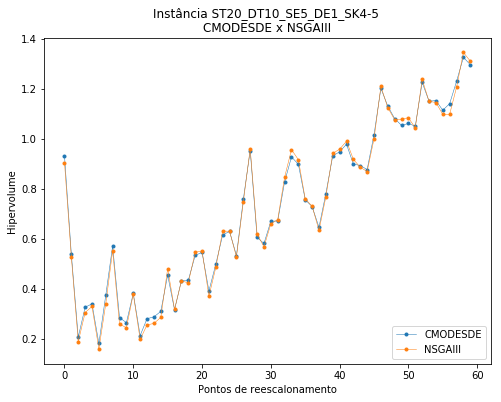

In [318]:
plot_hv(hv_event, inst, algorithms)


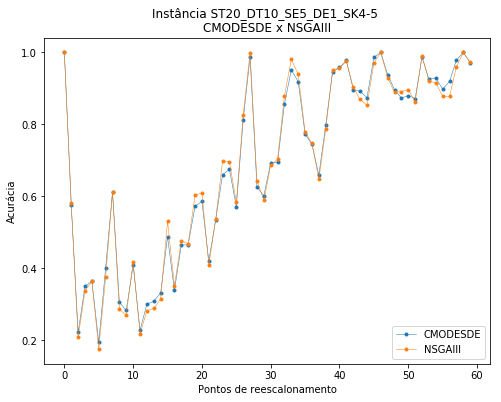

In [319]:
plot_acc(acc_event, inst, algorithms)


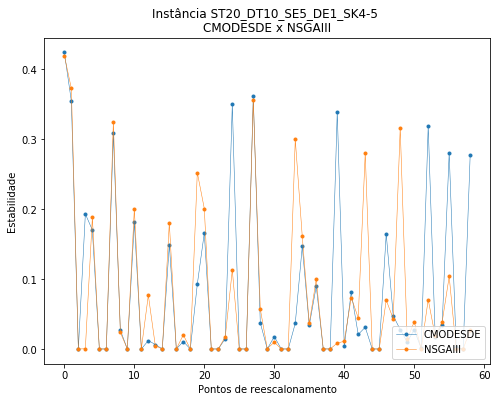

In [320]:
plot_stab(stab_event, inst, algorithms)

In [321]:
stat, p = wilcoxon(*datasets) #friedmanchisquare(*datasets)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')


Statistics=682.000, p=8.629876E-02
Mesmas distribuições (falhou em rejeitar H0)


In [322]:
stat, p = wilcoxon(*datasetsAcc) #friedmanchisquare(*datasetsAcc)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=779.000, p=7.058783E-01
Mesmas distribuições (falhou em rejeitar H0)


In [323]:
stat, p = wilcoxon(*datasetsStab) #friedmanchisquare(*datasetsStab)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=345.000, p=2.678879E-01
Mesmas distribuições (falhou em rejeitar H0)


In [324]:
df = pd.DataFrame({alg: hv_event[inst][alg].hypervolume for alg in algorithms})
df = df.melt(var_name="algorithm", value_name="hypervolume")
pc = sp.posthoc_conover(df, group_col="algorithm", val_col="hypervolume")
pc

CMODESDE   NSGAIII
CMODESDE -1.00E+00  9.33E-01
NSGAIII   9.33E-01 -1.00E+00

(<matplotlib.axes._subplots.AxesSubplot at 0x7f1c069140f0>,
 <matplotlib.colorbar.ColorbarBase at 0x7f1c06dcdef0>)

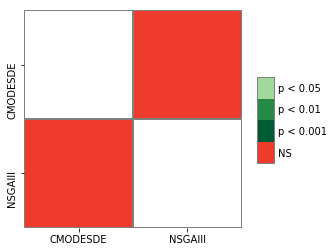

In [325]:
sp.sign_plot(pc, **heatmap_args)

### Instância ST20_DT10_SE10_DE1_SK4-5

None

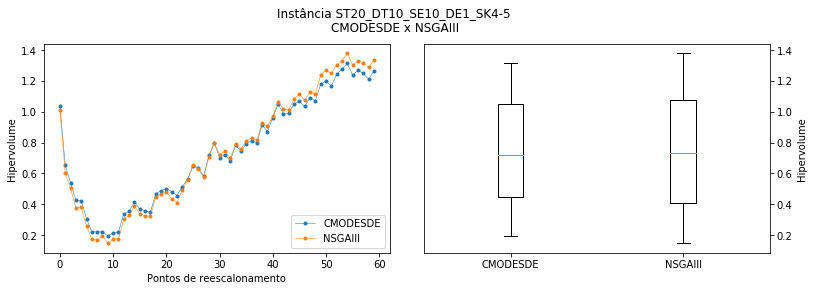

In [326]:
inst = "ST20_DT10_SE10_DE1_SK4-5"
algorithms = ["CMODESDE", "NSGAIII"]    

datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]
datasetsAcc = [acc_event[inst][alg].accuracy for alg in algorithms]
datasetsStab = [stab_event[inst][alg].stability for alg in algorithms]

display(combined_plot_hv(hv_event, inst, algorithms))

None

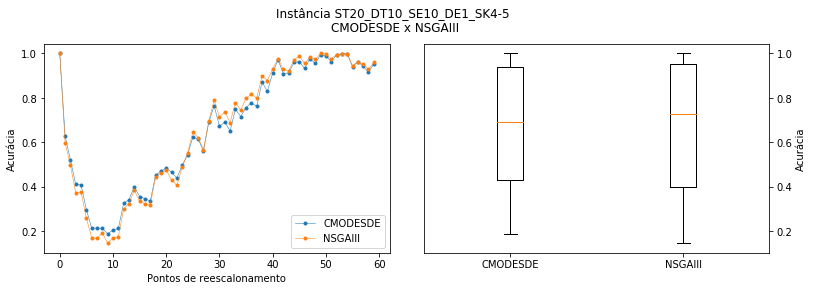

In [327]:
display(combined_plot_acc(acc_event, inst, algorithms))

None

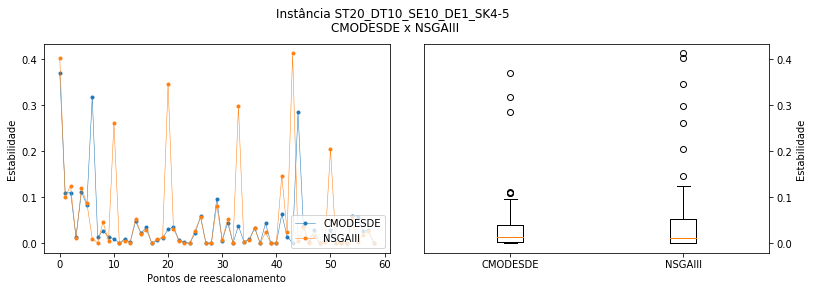

In [328]:
display(combined_plot_stab(stab_event, inst, algorithms))

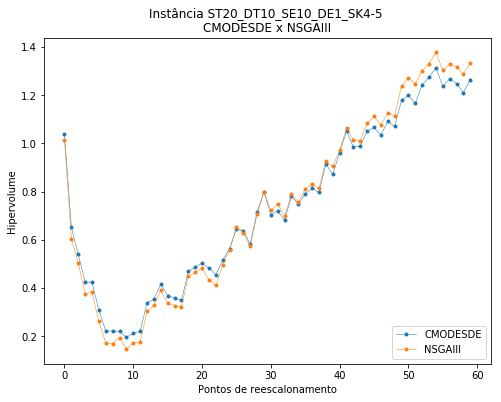

In [329]:
plot_hv(hv_event, inst, algorithms)


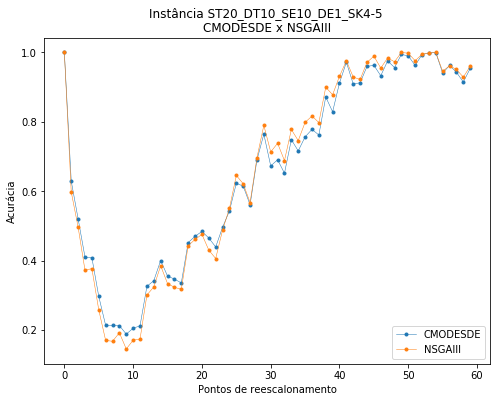

In [330]:
plot_acc(acc_event, inst, algorithms)


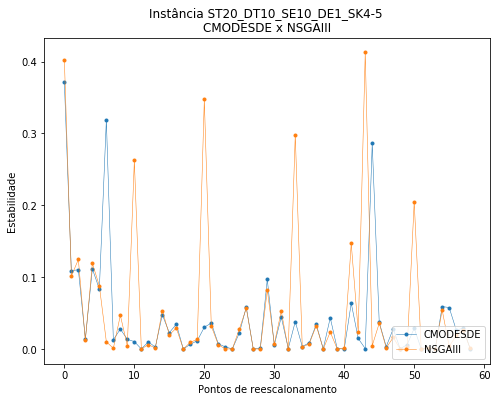

In [331]:
plot_stab(stab_event, inst, algorithms)

In [332]:
stat, p = wilcoxon(*datasets) #friedmanchisquare(*datasets)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')


Statistics=822.000, p=4.935780E-01
Mesmas distribuições (falhou em rejeitar H0)


In [333]:
stat, p = wilcoxon(*datasetsAcc) #friedmanchisquare(*datasetsAcc)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=852.000, p=8.032964E-01
Mesmas distribuições (falhou em rejeitar H0)


In [334]:
stat, p = wilcoxon(*datasetsStab) #friedmanchisquare(*datasetsStab)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=708.000, p=7.664264E-01
Mesmas distribuições (falhou em rejeitar H0)


In [335]:
df = pd.DataFrame({alg: hv_event[inst][alg].hypervolume for alg in algorithms})
df = df.melt(var_name="algorithm", value_name="hypervolume")
pc = sp.posthoc_conover(df, group_col="algorithm", val_col="hypervolume")
pc

CMODESDE   NSGAIII
CMODESDE -1.00E+00  9.25E-01
NSGAIII   9.25E-01 -1.00E+00

(<matplotlib.axes._subplots.AxesSubplot at 0x7f1c063be048>,
 <matplotlib.colorbar.ColorbarBase at 0x7f1c064a8198>)

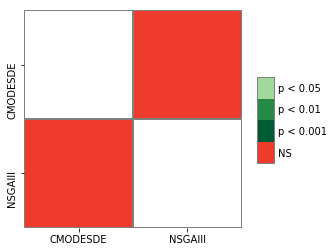

In [336]:
sp.sign_plot(pc, **heatmap_args)

### Instância ST20_DT10_SE15_DE1_SK4-5

None

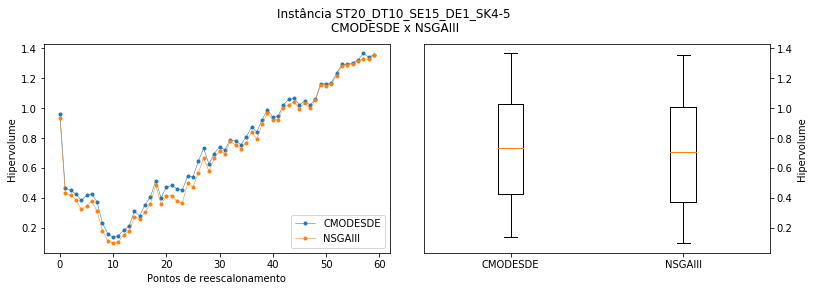

In [337]:
inst = "ST20_DT10_SE15_DE1_SK4-5"
algorithms = ["CMODESDE", "NSGAIII"]    

datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]
datasetsAcc = [acc_event[inst][alg].accuracy for alg in algorithms]
datasetsStab = [stab_event[inst][alg].stability for alg in algorithms]

display(combined_plot_hv(hv_event, inst, algorithms))

None

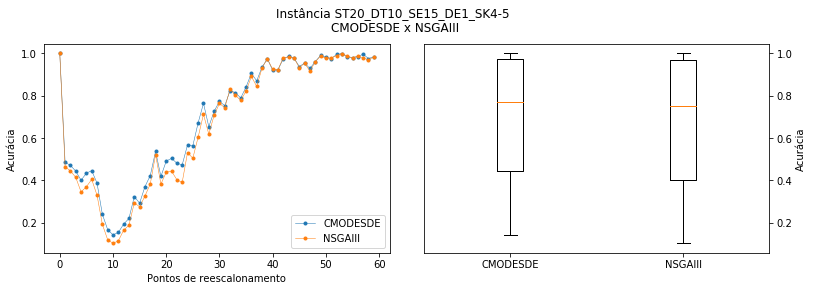

In [338]:
display(combined_plot_acc(acc_event, inst, algorithms))

None

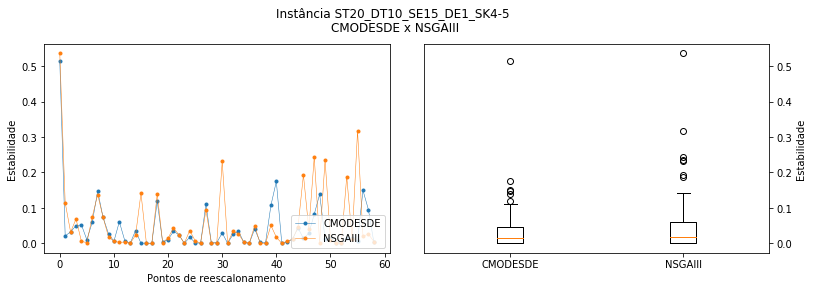

In [339]:
display(combined_plot_stab(stab_event, inst, algorithms))

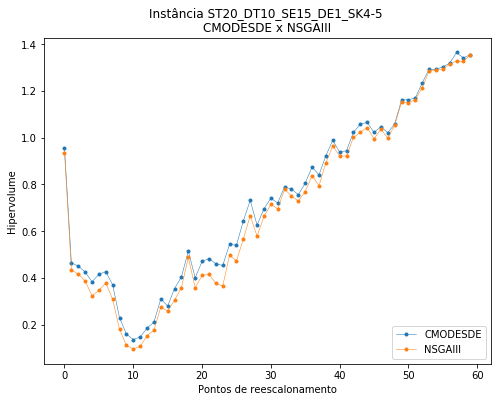

In [340]:
plot_hv(hv_event, inst, algorithms)


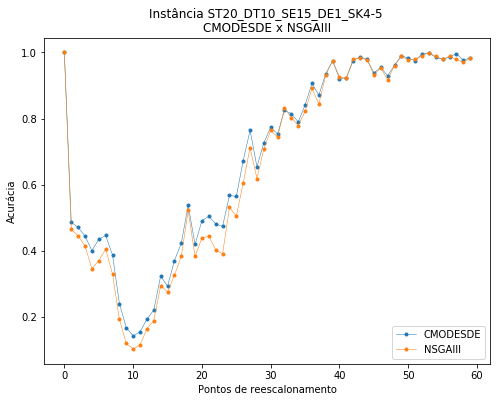

In [341]:
plot_acc(acc_event, inst, algorithms)


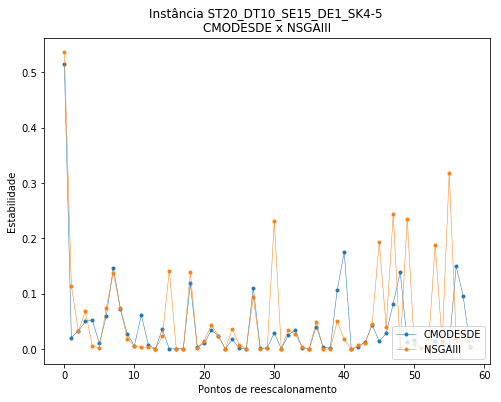

In [342]:
plot_stab(stab_event, inst, algorithms)

In [343]:
stat, p = wilcoxon(*datasets) #friedmanchisquare(*datasets)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')


Statistics=0.000, p=1.629556E-11
Distribuições diferentes (rejeitar H0)


In [344]:
stat, p = wilcoxon(*datasetsAcc) #friedmanchisquare(*datasetsAcc)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=104.000, p=3.747512E-09
Distribuições diferentes (rejeitar H0)


In [345]:
stat, p = wilcoxon(*datasetsStab) #friedmanchisquare(*datasetsStab)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=698.000, p=5.463388E-01
Mesmas distribuições (falhou em rejeitar H0)


In [346]:
df = pd.DataFrame({alg: hv_event[inst][alg].hypervolume for alg in algorithms})
df = df.melt(var_name="algorithm", value_name="hypervolume")
pc = sp.posthoc_conover(df, group_col="algorithm", val_col="hypervolume")
pc

CMODESDE   NSGAIII
CMODESDE -1.00E+00  4.91E-01
NSGAIII   4.91E-01 -1.00E+00

(<matplotlib.axes._subplots.AxesSubplot at 0x7f1c073e9358>,
 <matplotlib.colorbar.ColorbarBase at 0x7f1c065fd6d8>)

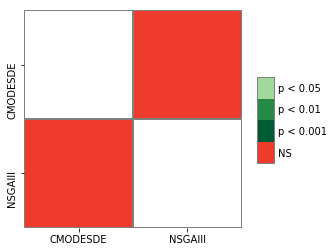

In [347]:
sp.sign_plot(pc, **heatmap_args)

### Instância ST20_DT10_SE5_DE1_SK6-7

None

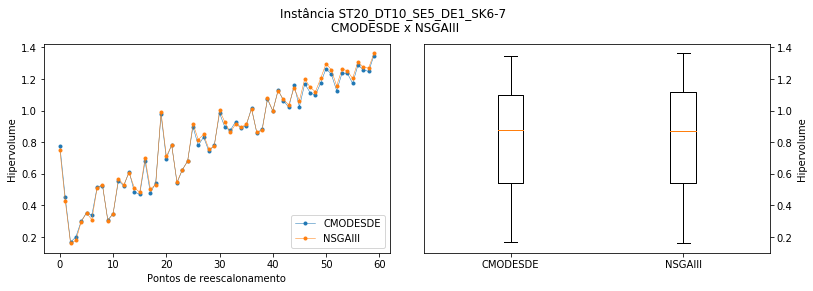

In [348]:
inst = "ST20_DT10_SE5_DE1_SK6-7"
algorithms = ["CMODESDE", "NSGAIII"]    

datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]
datasetsAcc = [acc_event[inst][alg].accuracy for alg in algorithms]
datasetsStab = [stab_event[inst][alg].stability for alg in algorithms]

display(combined_plot_hv(hv_event, inst, algorithms))

None

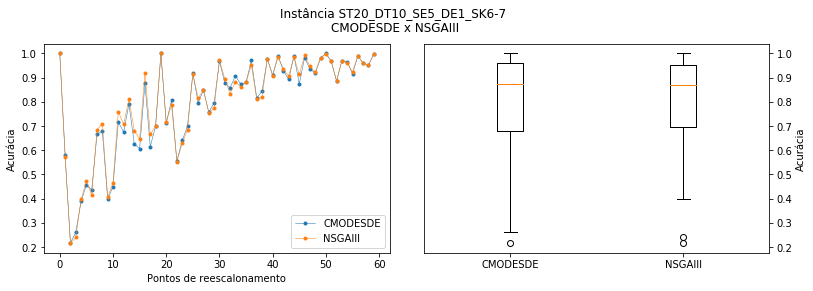

In [349]:
display(combined_plot_acc(acc_event, inst, algorithms))

None

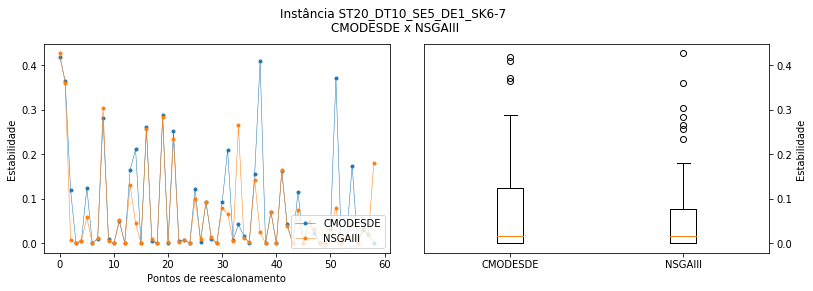

In [350]:
display(combined_plot_stab(stab_event, inst, algorithms))

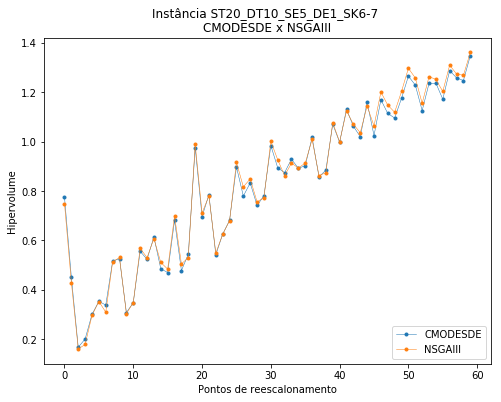

In [351]:
plot_hv(hv_event, inst, algorithms)


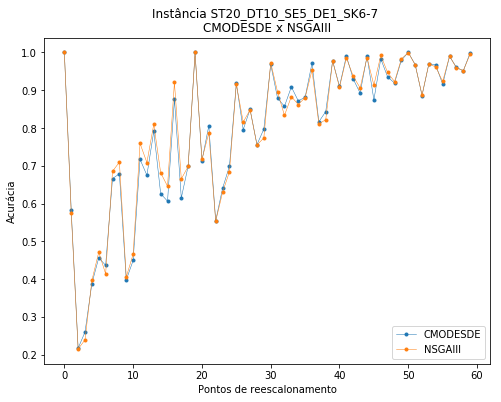

In [352]:
plot_acc(acc_event, inst, algorithms)


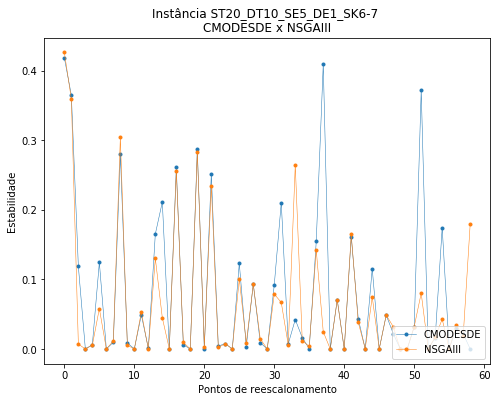

In [353]:
plot_stab(stab_event, inst, algorithms)

In [354]:
stat, p = wilcoxon(*datasets) #friedmanchisquare(*datasets)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')


Statistics=457.000, p=7.472906E-04
Distribuições diferentes (rejeitar H0)


In [355]:
stat, p = wilcoxon(*datasetsAcc) #friedmanchisquare(*datasetsAcc)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=722.000, p=3.013216E-01
Mesmas distribuições (falhou em rejeitar H0)


In [356]:
stat, p = wilcoxon(*datasetsStab) #friedmanchisquare(*datasetsStab)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=410.000, p=6.790073E-02
Mesmas distribuições (falhou em rejeitar H0)


In [357]:
df = pd.DataFrame({alg: hv_event[inst][alg].hypervolume for alg in algorithms})
df = df.melt(var_name="algorithm", value_name="hypervolume")
pc = sp.posthoc_conover(df, group_col="algorithm", val_col="hypervolume")
pc

CMODESDE   NSGAIII
CMODESDE -1.00E+00  8.51E-01
NSGAIII   8.51E-01 -1.00E+00

(<matplotlib.axes._subplots.AxesSubplot at 0x7f1c063ae5c0>,
 <matplotlib.colorbar.ColorbarBase at 0x7f1c06877630>)

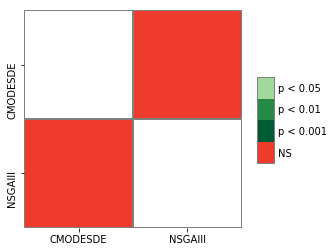

In [358]:
sp.sign_plot(pc, **heatmap_args)

### Instância ST20_DT10_SE10_DE1_SK6-7

None

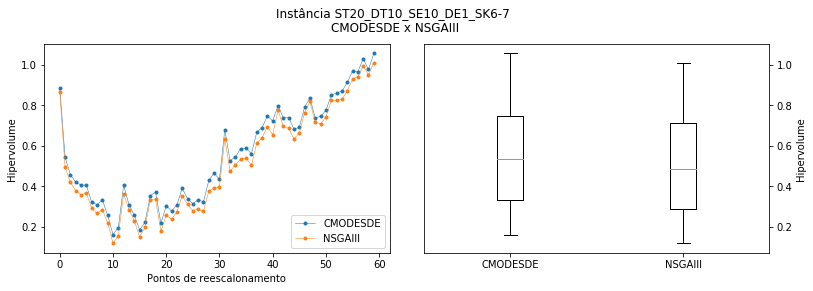

In [359]:
inst = "ST20_DT10_SE10_DE1_SK6-7"
algorithms = ["CMODESDE", "NSGAIII"]    

datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]
datasetsAcc = [acc_event[inst][alg].accuracy for alg in algorithms]
datasetsStab = [stab_event[inst][alg].stability for alg in algorithms]

display(combined_plot_hv(hv_event, inst, algorithms))

None

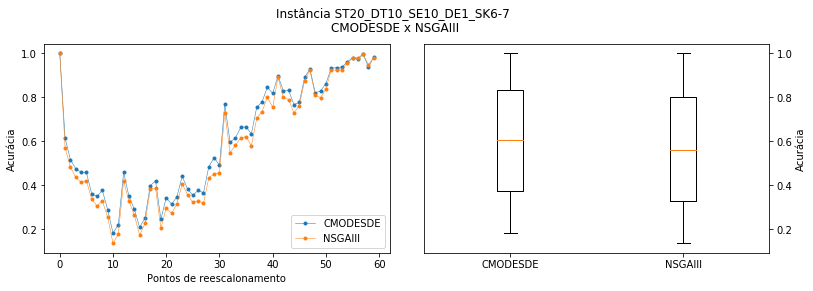

In [360]:
display(combined_plot_acc(acc_event, inst, algorithms))

None

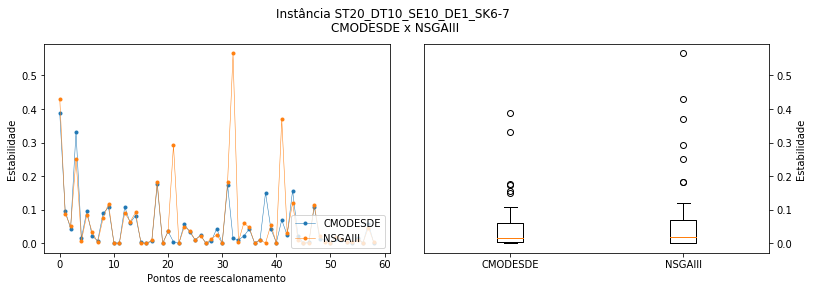

In [361]:
display(combined_plot_stab(stab_event, inst, algorithms))

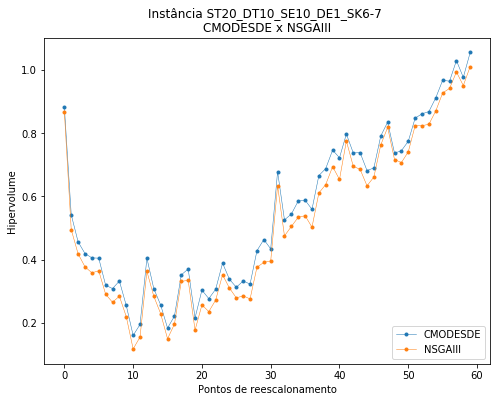

In [362]:
plot_hv(hv_event, inst, algorithms)


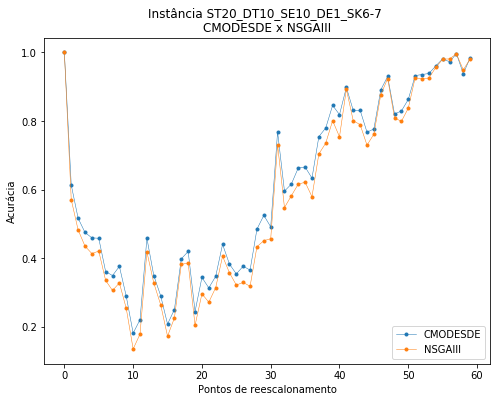

In [363]:
plot_acc(acc_event, inst, algorithms)


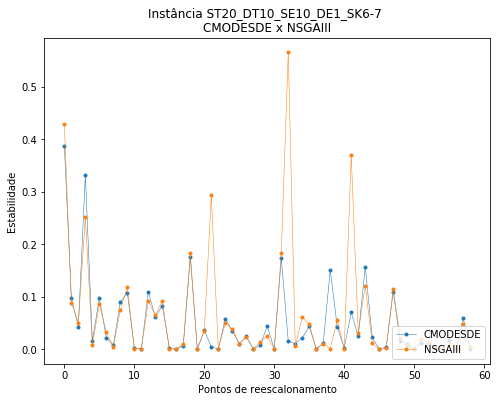

In [364]:
plot_stab(stab_event, inst, algorithms)

In [365]:
stat, p = wilcoxon(*datasets) #friedmanchisquare(*datasets)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')


Statistics=0.000, p=1.629556E-11
Distribuições diferentes (rejeitar H0)


In [366]:
stat, p = wilcoxon(*datasetsAcc) #friedmanchisquare(*datasetsAcc)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=17.000, p=5.690740E-11
Distribuições diferentes (rejeitar H0)


In [367]:
stat, p = wilcoxon(*datasetsStab) #friedmanchisquare(*datasetsStab)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=620.000, p=6.869048E-01
Mesmas distribuições (falhou em rejeitar H0)


In [368]:
df = pd.DataFrame({alg: hv_event[inst][alg].hypervolume for alg in algorithms})
df = df.melt(var_name="algorithm", value_name="hypervolume")
pc = sp.posthoc_conover(df, group_col="algorithm", val_col="hypervolume")
pc

CMODESDE   NSGAIII
CMODESDE -1.00E+00  3.34E-01
NSGAIII   3.34E-01 -1.00E+00

(<matplotlib.axes._subplots.AxesSubplot at 0x7f1c06fcb7b8>,
 <matplotlib.colorbar.ColorbarBase at 0x7f1c065e87b8>)

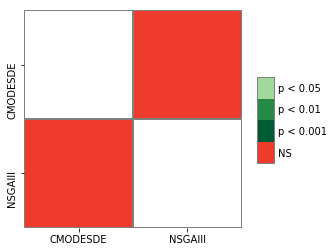

In [369]:
sp.sign_plot(pc, **heatmap_args)

### Instância ST20_DT10_SE15_DE1_SK6-7

None

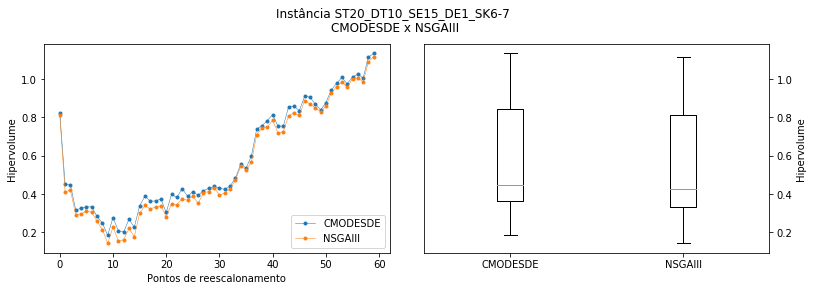

In [370]:
inst = "ST20_DT10_SE15_DE1_SK6-7"
algorithms = ["CMODESDE", "NSGAIII"]    

datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]
datasetsAcc = [acc_event[inst][alg].accuracy for alg in algorithms]
datasetsStab = [stab_event[inst][alg].stability for alg in algorithms]

display(combined_plot_hv(hv_event, inst, algorithms))

None

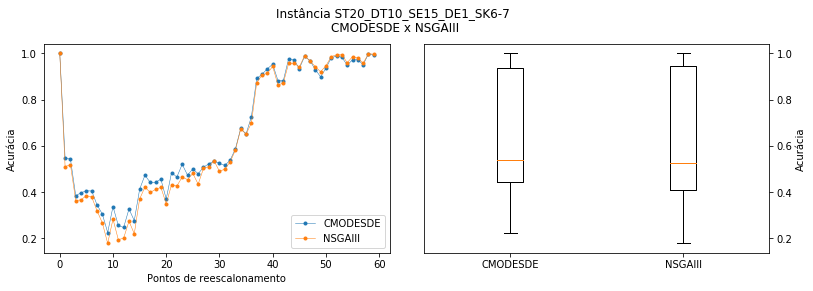

In [371]:
display(combined_plot_acc(acc_event, inst, algorithms))

None

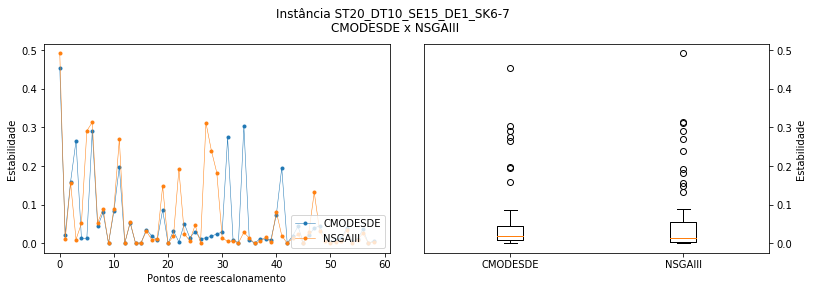

In [372]:
display(combined_plot_stab(stab_event, inst, algorithms))

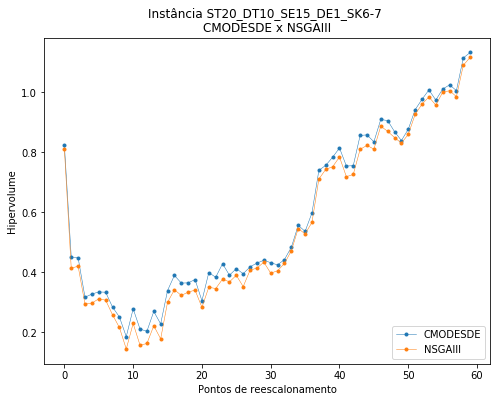

In [373]:
plot_hv(hv_event, inst, algorithms)


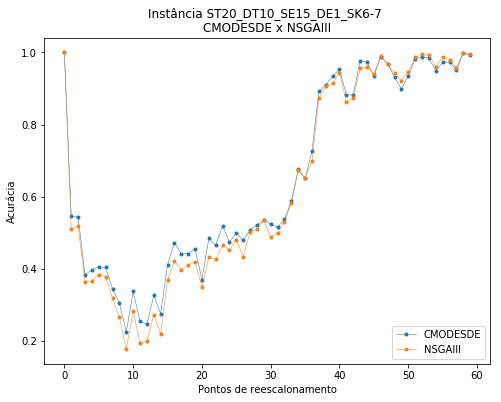

In [374]:
plot_acc(acc_event, inst, algorithms)


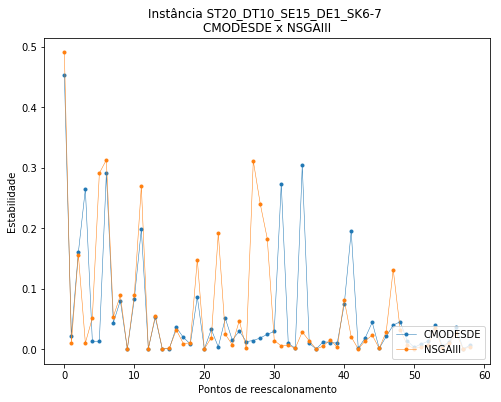

In [375]:
plot_stab(stab_event, inst, algorithms)

In [376]:
stat, p = wilcoxon(*datasets) #friedmanchisquare(*datasets)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')


Statistics=0.000, p=1.629556E-11
Distribuições diferentes (rejeitar H0)


In [377]:
stat, p = wilcoxon(*datasetsAcc) #friedmanchisquare(*datasetsAcc)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=226.000, p=6.554600E-07
Distribuições diferentes (rejeitar H0)


In [378]:
stat, p = wilcoxon(*datasetsStab) #friedmanchisquare(*datasetsStab)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=723.000, p=8.666625E-01
Mesmas distribuições (falhou em rejeitar H0)


In [379]:
df = pd.DataFrame({alg: hv_event[inst][alg].hypervolume for alg in algorithms})
df = df.melt(var_name="algorithm", value_name="hypervolume")
pc = sp.posthoc_conover(df, group_col="algorithm", val_col="hypervolume")
pc

CMODESDE   NSGAIII
CMODESDE -1.00E+00  4.00E-01
NSGAIII   4.00E-01 -1.00E+00

(<matplotlib.axes._subplots.AxesSubplot at 0x7f1c06217978>,
 <matplotlib.colorbar.ColorbarBase at 0x7f1c066dab38>)

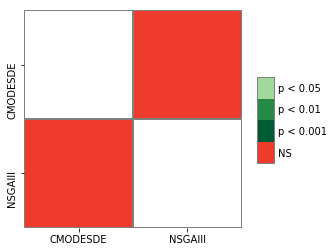

In [380]:
sp.sign_plot(pc, **heatmap_args)

### Instância ST30_DT10_SE5_DE1_SK4-5

None

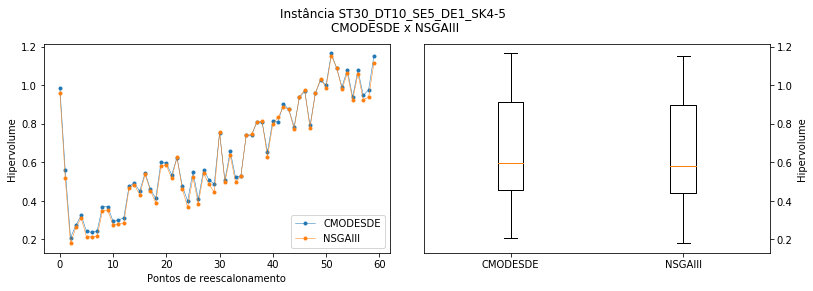

In [381]:
inst = "ST30_DT10_SE5_DE1_SK4-5"
algorithms = ["CMODESDE", "NSGAIII"]    

datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]
datasetsAcc = [acc_event[inst][alg].accuracy for alg in algorithms]
datasetsStab = [stab_event[inst][alg].stability for alg in algorithms]

display(combined_plot_hv(hv_event, inst, algorithms))

None

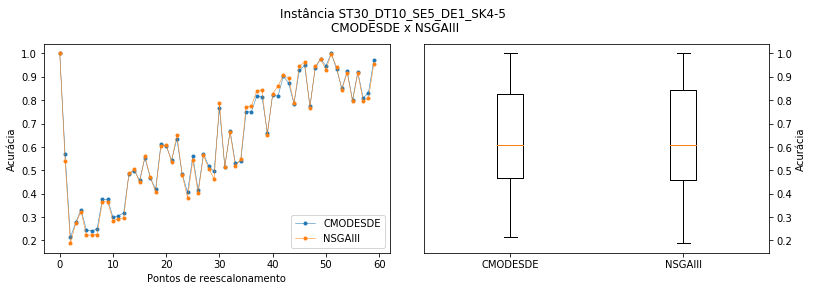

In [382]:
display(combined_plot_acc(acc_event, inst, algorithms))

None

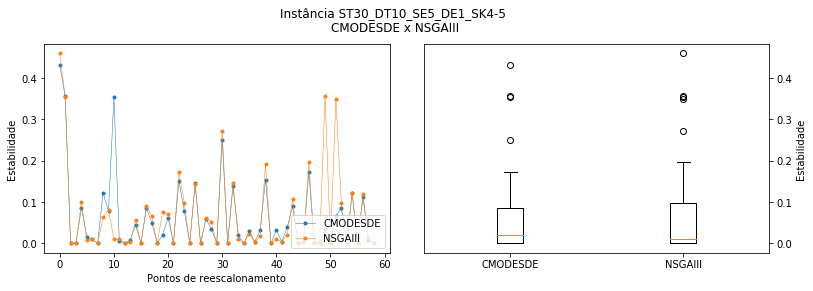

In [383]:
display(combined_plot_stab(stab_event, inst, algorithms))

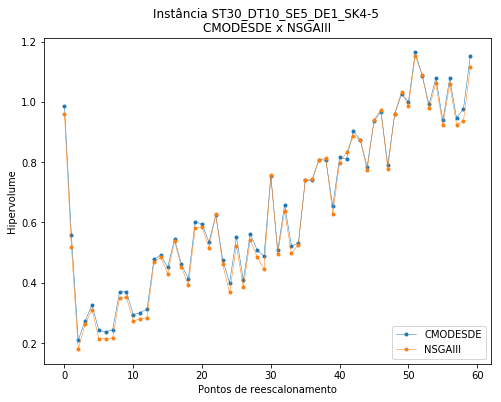

In [384]:
plot_hv(hv_event, inst, algorithms)


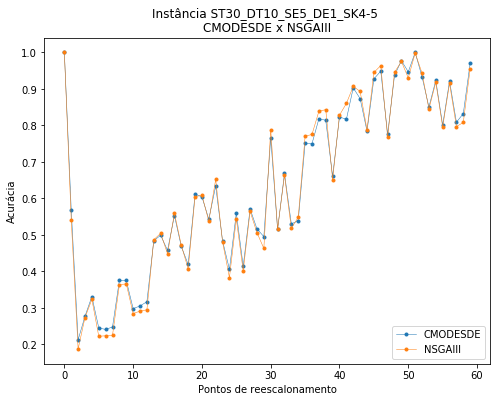

In [385]:
plot_acc(acc_event, inst, algorithms)


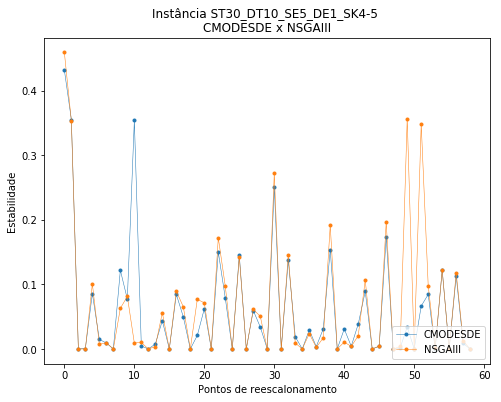

In [386]:
plot_stab(stab_event, inst, algorithms)

In [387]:
stat, p = wilcoxon(*datasets) #friedmanchisquare(*datasets)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')


Statistics=124.000, p=5.779088E-09
Distribuições diferentes (rejeitar H0)


In [388]:
stat, p = wilcoxon(*datasetsAcc) #friedmanchisquare(*datasetsAcc)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=646.000, p=7.123660E-02
Mesmas distribuições (falhou em rejeitar H0)


In [389]:
stat, p = wilcoxon(*datasetsStab) #friedmanchisquare(*datasetsStab)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=276.000, p=2.820717E-02
Distribuições diferentes (rejeitar H0)


In [390]:
df = pd.DataFrame({alg: hv_event[inst][alg].hypervolume for alg in algorithms})
df = df.melt(var_name="algorithm", value_name="hypervolume")
pc = sp.posthoc_conover(df, group_col="algorithm", val_col="hypervolume")
pc

CMODESDE   NSGAIII
CMODESDE -1.00E+00  7.15E-01
NSGAIII   7.15E-01 -1.00E+00

(<matplotlib.axes._subplots.AxesSubplot at 0x7f1c06878a20>,
 <matplotlib.colorbar.ColorbarBase at 0x7f1c062f6438>)

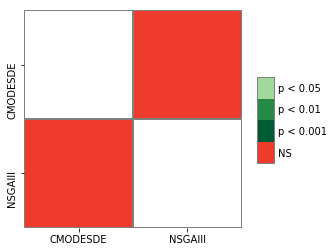

In [391]:
sp.sign_plot(pc, **heatmap_args)

### Instância ST30_DT10_SE10_DE1_SK4-5

None

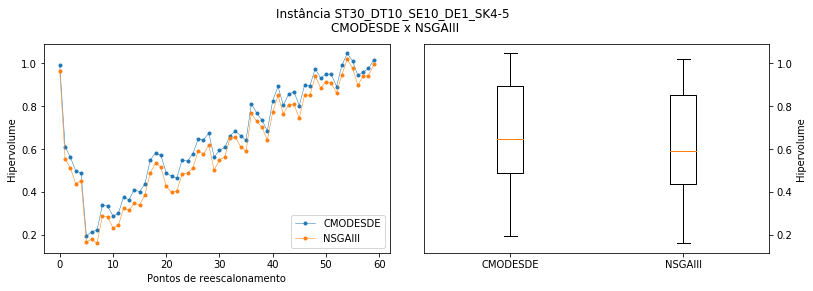

In [392]:
inst = "ST30_DT10_SE10_DE1_SK4-5"
algorithms = ["CMODESDE", "NSGAIII"]    

datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]
datasetsAcc = [acc_event[inst][alg].accuracy for alg in algorithms]
datasetsStab = [stab_event[inst][alg].stability for alg in algorithms]

display(combined_plot_hv(hv_event, inst, algorithms))

None

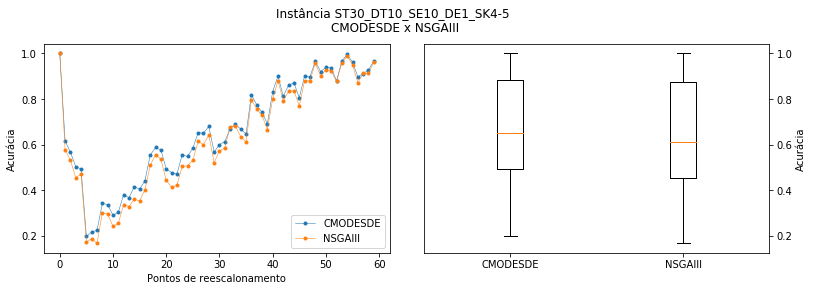

In [393]:
display(combined_plot_acc(acc_event, inst, algorithms))

None

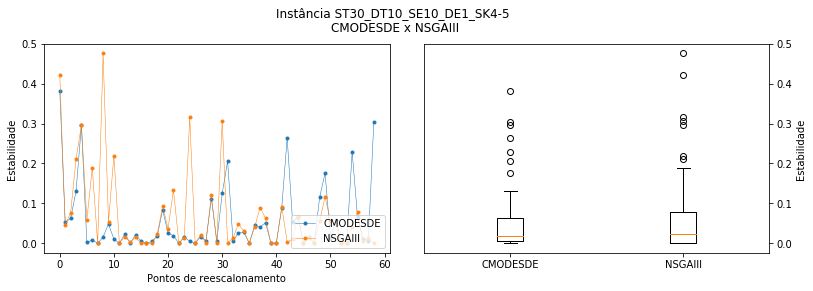

In [394]:
display(combined_plot_stab(stab_event, inst, algorithms))

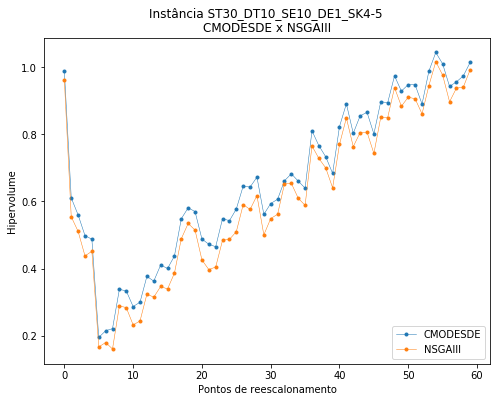

In [395]:
plot_hv(hv_event, inst, algorithms)


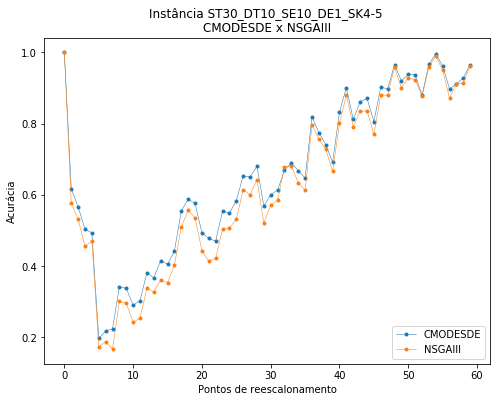

In [396]:
plot_acc(acc_event, inst, algorithms)


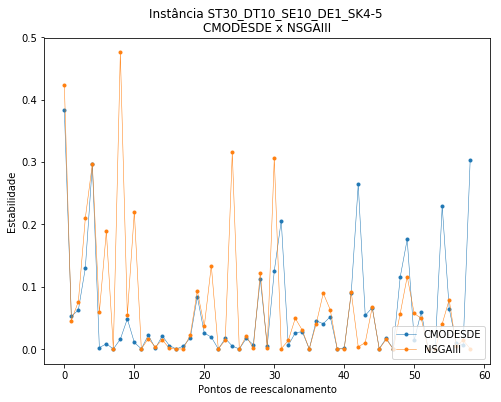

In [397]:
plot_stab(stab_event, inst, algorithms)

In [398]:
stat, p = wilcoxon(*datasets) #friedmanchisquare(*datasets)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')


Statistics=0.000, p=1.629556E-11
Distribuições diferentes (rejeitar H0)


In [399]:
stat, p = wilcoxon(*datasetsAcc) #friedmanchisquare(*datasetsAcc)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=10.000, p=3.989178E-11
Distribuições diferentes (rejeitar H0)


In [400]:
stat, p = wilcoxon(*datasetsStab) #friedmanchisquare(*datasetsStab)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=571.000, p=2.008180E-01
Mesmas distribuições (falhou em rejeitar H0)


In [401]:
df = pd.DataFrame({alg: hv_event[inst][alg].hypervolume for alg in algorithms})
df = df.melt(var_name="algorithm", value_name="hypervolume")
pc = sp.posthoc_conover(df, group_col="algorithm", val_col="hypervolume")
pc

CMODESDE   NSGAIII
CMODESDE -1.00E+00  2.65E-01
NSGAIII   2.65E-01 -1.00E+00

(<matplotlib.axes._subplots.AxesSubplot at 0x7f1c06155748>,
 <matplotlib.colorbar.ColorbarBase at 0x7f1c0631c588>)

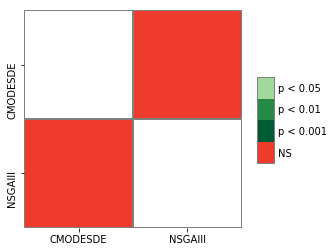

In [402]:
sp.sign_plot(pc, **heatmap_args)

### Instância ST30_DT10_SE15_DE1_SK4-5

None

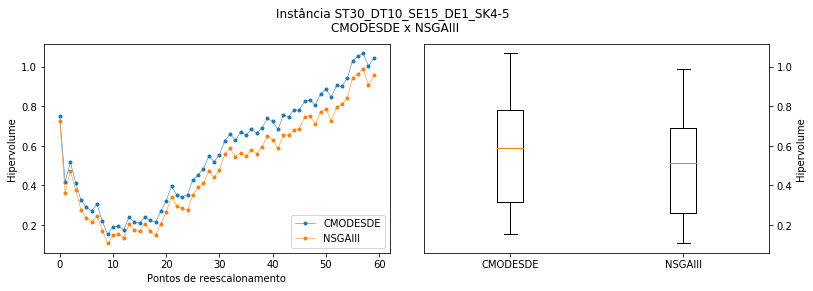

In [403]:
inst = "ST30_DT10_SE15_DE1_SK4-5"
algorithms = ["CMODESDE", "NSGAIII"]    

datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]
datasetsAcc = [acc_event[inst][alg].accuracy for alg in algorithms]
datasetsStab = [stab_event[inst][alg].stability for alg in algorithms]

display(combined_plot_hv(hv_event, inst, algorithms))

None

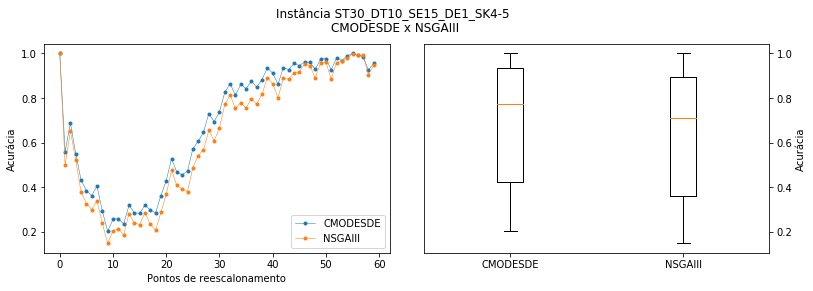

In [404]:
display(combined_plot_acc(acc_event, inst, algorithms))

None

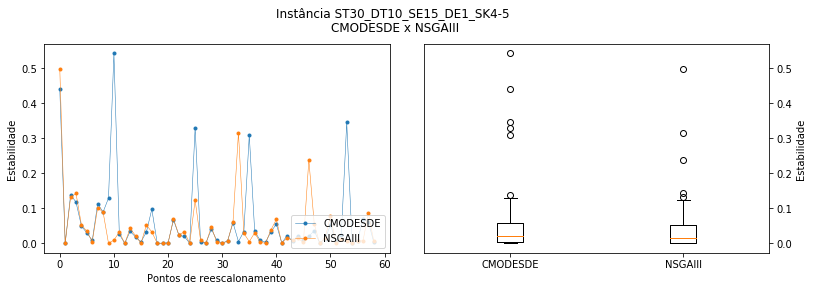

In [405]:
display(combined_plot_stab(stab_event, inst, algorithms))

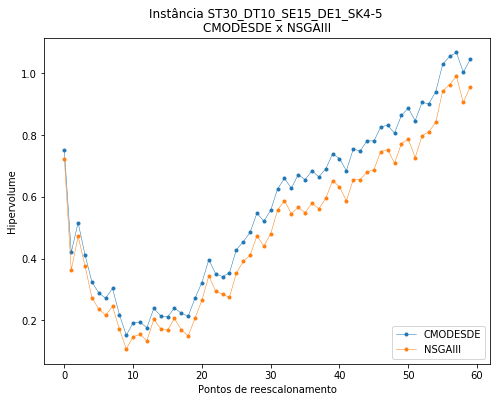

In [406]:
plot_hv(hv_event, inst, algorithms)


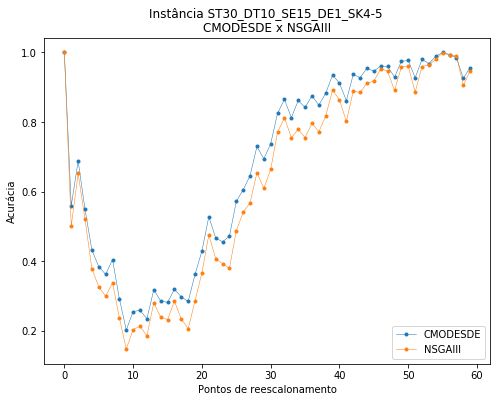

In [407]:
plot_acc(acc_event, inst, algorithms)


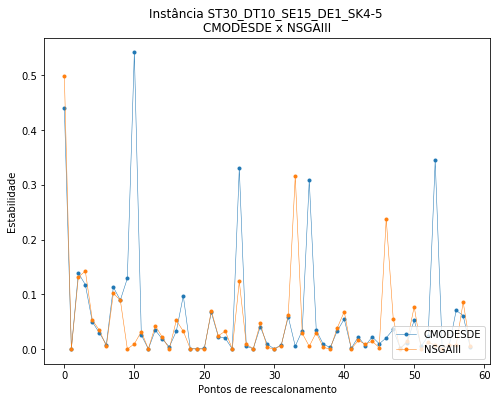

In [408]:
plot_stab(stab_event, inst, algorithms)

In [409]:
stat, p = wilcoxon(*datasets) #friedmanchisquare(*datasets)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')


Statistics=0.000, p=1.629556E-11
Distribuições diferentes (rejeitar H0)


In [410]:
stat, p = wilcoxon(*datasetsAcc) #friedmanchisquare(*datasetsAcc)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=4.000, p=2.935577E-11
Distribuições diferentes (rejeitar H0)


In [411]:
stat, p = wilcoxon(*datasetsStab) #friedmanchisquare(*datasetsStab)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=746.000, p=8.406320E-01
Mesmas distribuições (falhou em rejeitar H0)


In [412]:
df = pd.DataFrame({alg: hv_event[inst][alg].hypervolume for alg in algorithms})
df = df.melt(var_name="algorithm", value_name="hypervolume")
pc = sp.posthoc_conover(df, group_col="algorithm", val_col="hypervolume")
pc

CMODESDE   NSGAIII
CMODESDE -1.00E+00  1.19E-01
NSGAIII   1.19E-01 -1.00E+00

(<matplotlib.axes._subplots.AxesSubplot at 0x7f1c07458e80>,
 <matplotlib.colorbar.ColorbarBase at 0x7f1c06240f60>)

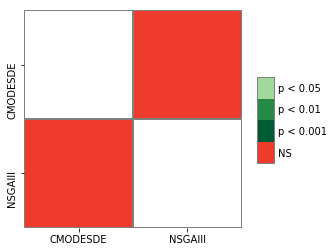

In [413]:
sp.sign_plot(pc, **heatmap_args)

### Instância ST30_DT10_SE5_DE1_SK6-7

None

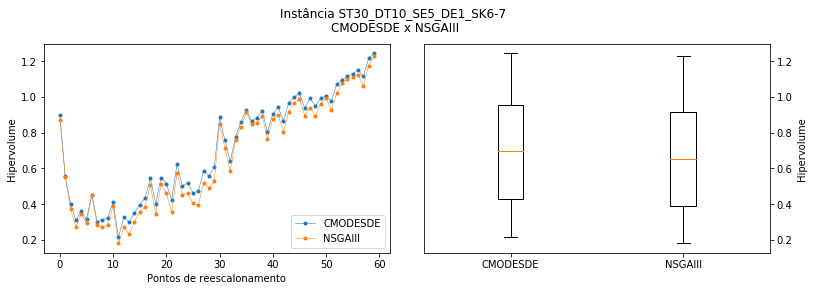

In [414]:
inst = "ST30_DT10_SE5_DE1_SK6-7"
algorithms = ["CMODESDE", "NSGAIII"]    

datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]
datasetsAcc = [acc_event[inst][alg].accuracy for alg in algorithms]
datasetsStab = [stab_event[inst][alg].stability for alg in algorithms]

display(combined_plot_hv(hv_event, inst, algorithms))

None

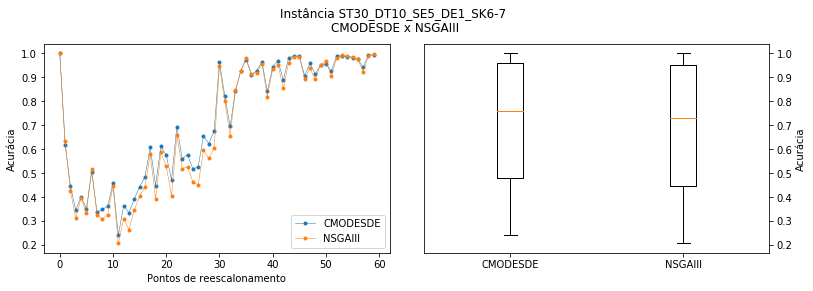

In [415]:
display(combined_plot_acc(acc_event, inst, algorithms))

None

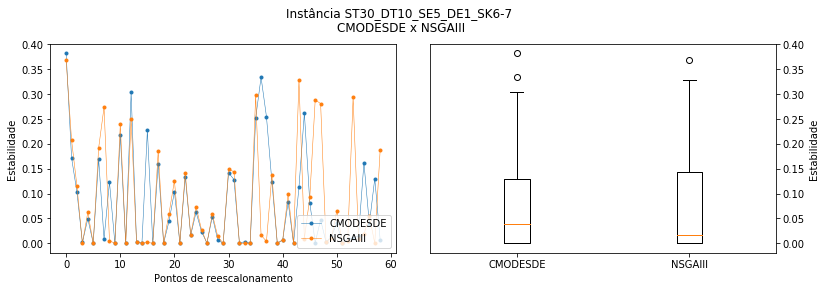

In [416]:
display(combined_plot_stab(stab_event, inst, algorithms))

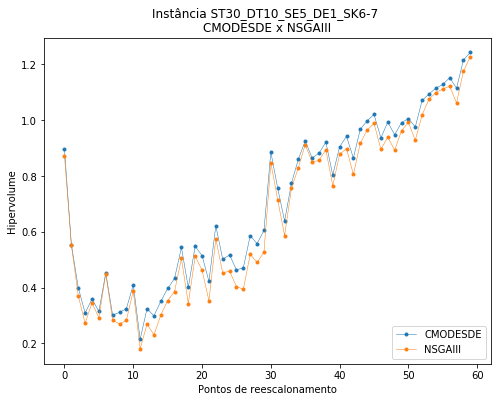

In [417]:
plot_hv(hv_event, inst, algorithms)


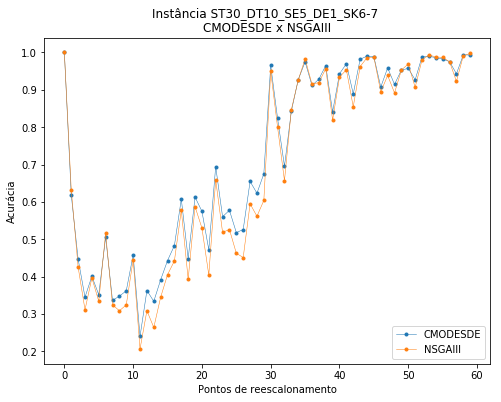

In [418]:
plot_acc(acc_event, inst, algorithms)


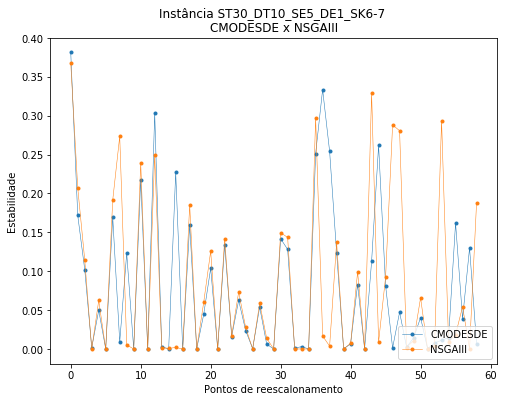

In [419]:
plot_stab(stab_event, inst, algorithms)

In [420]:
stat, p = wilcoxon(*datasets) #friedmanchisquare(*datasets)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')


Statistics=0.000, p=1.629556E-11
Distribuições diferentes (rejeitar H0)


In [421]:
stat, p = wilcoxon(*datasetsAcc) #friedmanchisquare(*datasetsAcc)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=128.000, p=1.104693E-08
Distribuições diferentes (rejeitar H0)


In [422]:
stat, p = wilcoxon(*datasetsStab) #friedmanchisquare(*datasetsStab)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=433.000, p=7.417387E-02
Mesmas distribuições (falhou em rejeitar H0)


In [423]:
df = pd.DataFrame({alg: hv_event[inst][alg].hypervolume for alg in algorithms})
df = df.melt(var_name="algorithm", value_name="hypervolume")
pc = sp.posthoc_conover(df, group_col="algorithm", val_col="hypervolume")
pc

CMODESDE   NSGAIII
CMODESDE -1.00E+00  3.21E-01
NSGAIII   3.21E-01 -1.00E+00

(<matplotlib.axes._subplots.AxesSubplot at 0x7f1c0604deb8>,
 <matplotlib.colorbar.ColorbarBase at 0x7f1c063a0c50>)

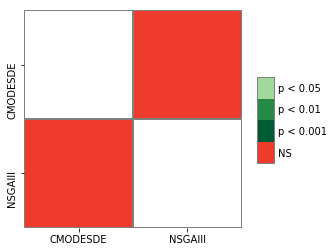

In [424]:
sp.sign_plot(pc, **heatmap_args)

### Instância ST30_DT10_SE10_DE1_SK6-7

None

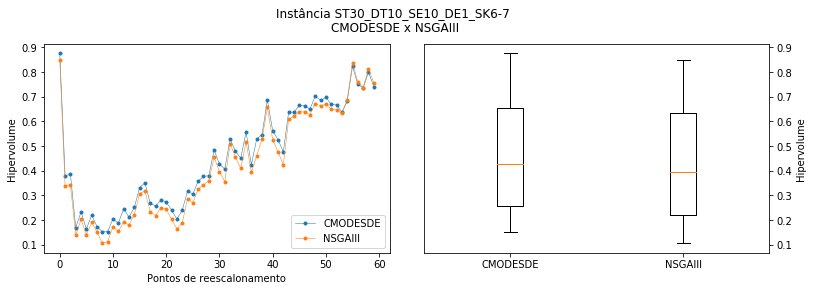

In [425]:
inst = "ST30_DT10_SE10_DE1_SK6-7"
algorithms = ["CMODESDE", "NSGAIII"]    

datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]
datasetsAcc = [acc_event[inst][alg].accuracy for alg in algorithms]
datasetsStab = [stab_event[inst][alg].stability for alg in algorithms]

display(combined_plot_hv(hv_event, inst, algorithms))

None

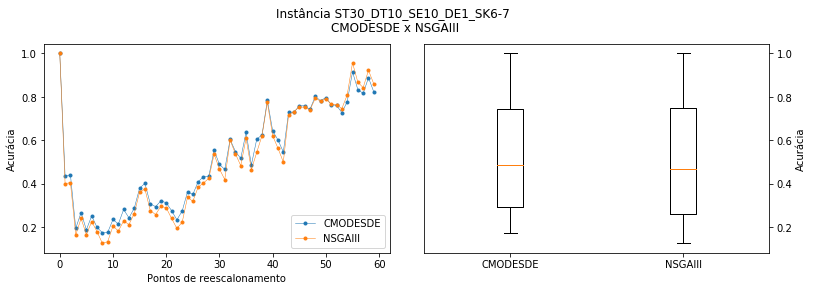

In [426]:
display(combined_plot_acc(acc_event, inst, algorithms))

None

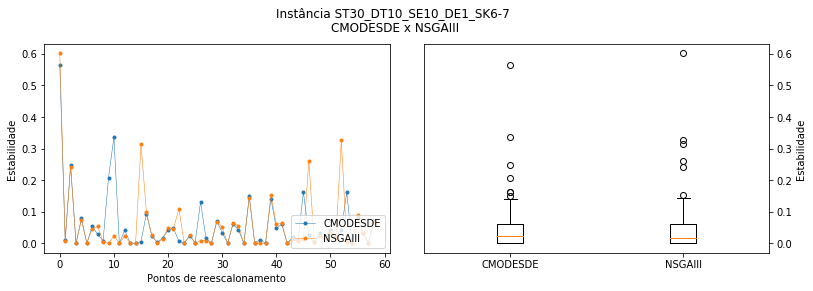

In [427]:
display(combined_plot_stab(stab_event, inst, algorithms))

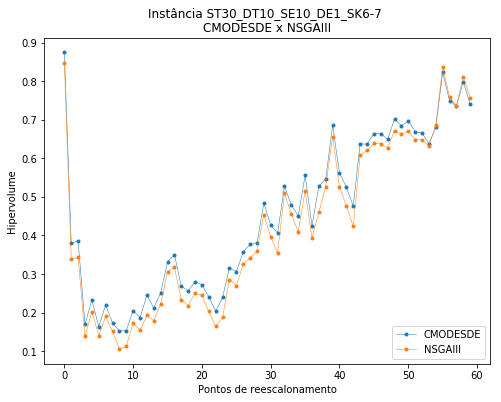

In [428]:
plot_hv(hv_event, inst, algorithms)


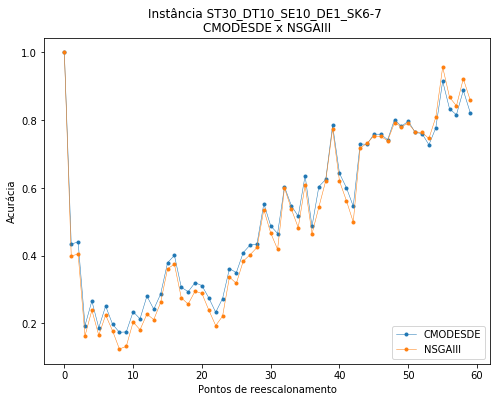

In [429]:
plot_acc(acc_event, inst, algorithms)


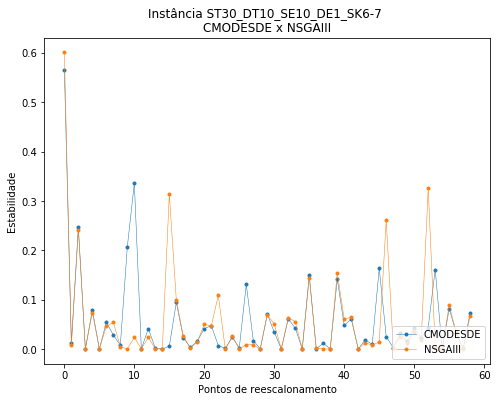

In [430]:
plot_stab(stab_event, inst, algorithms)

In [431]:
stat, p = wilcoxon(*datasets) #friedmanchisquare(*datasets)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')


Statistics=26.000, p=5.970872E-11
Distribuições diferentes (rejeitar H0)


In [432]:
stat, p = wilcoxon(*datasetsAcc) #friedmanchisquare(*datasetsAcc)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=286.000, p=6.147913E-06
Distribuições diferentes (rejeitar H0)


In [433]:
stat, p = wilcoxon(*datasetsStab) #friedmanchisquare(*datasetsStab)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=593.000, p=5.117323E-01
Mesmas distribuições (falhou em rejeitar H0)


In [434]:
df = pd.DataFrame({alg: hv_event[inst][alg].hypervolume for alg in algorithms})
df = df.melt(var_name="algorithm", value_name="hypervolume")
pc = sp.posthoc_conover(df, group_col="algorithm", val_col="hypervolume")
pc

CMODESDE   NSGAIII
CMODESDE -1.00E+00  3.52E-01
NSGAIII   3.52E-01 -1.00E+00

(<matplotlib.axes._subplots.AxesSubplot at 0x7f1c060bbf60>,
 <matplotlib.colorbar.ColorbarBase at 0x7f1c06681390>)

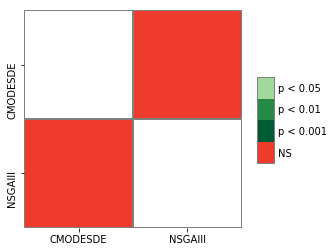

In [435]:
sp.sign_plot(pc, **heatmap_args)

### Instância ST30_DT10_SE15_DE1_SK6-7

None

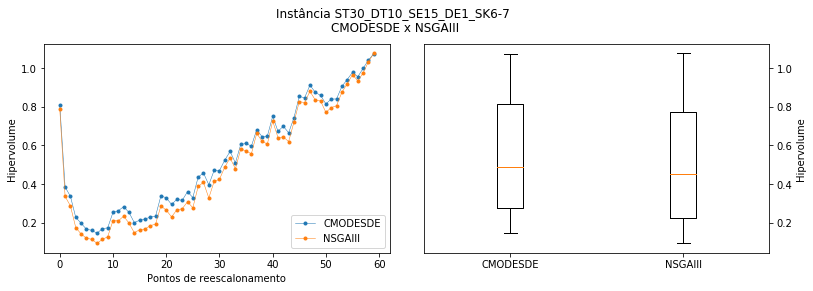

In [436]:
inst = "ST30_DT10_SE15_DE1_SK6-7"
algorithms = ["CMODESDE", "NSGAIII"]    

datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]
datasetsAcc = [acc_event[inst][alg].accuracy for alg in algorithms]
datasetsStab = [stab_event[inst][alg].stability for alg in algorithms]

display(combined_plot_hv(hv_event, inst, algorithms))

None

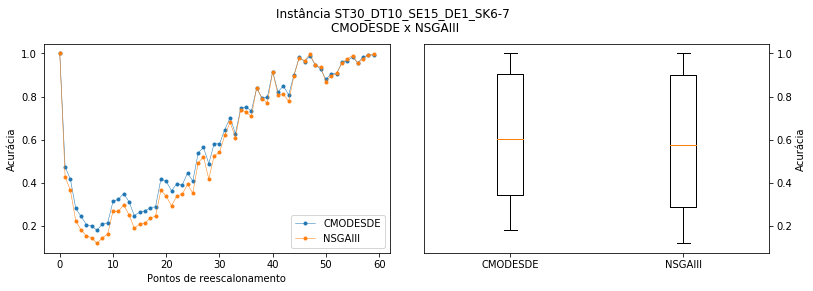

In [437]:
display(combined_plot_acc(acc_event, inst, algorithms))

None

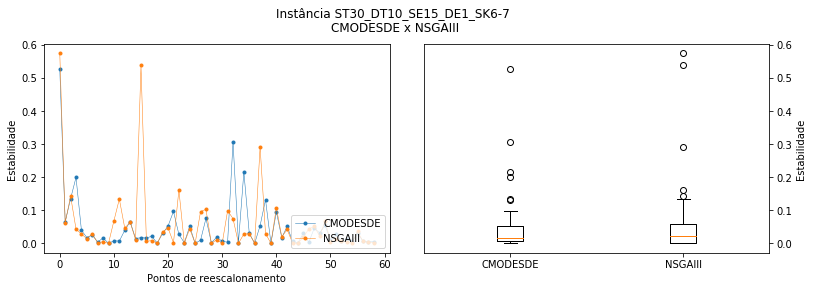

In [438]:
display(combined_plot_stab(stab_event, inst, algorithms))

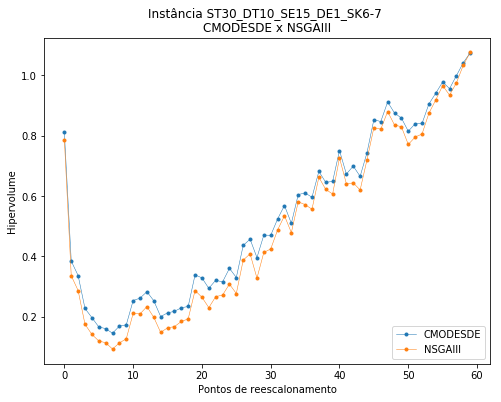

In [439]:
plot_hv(hv_event, inst, algorithms)


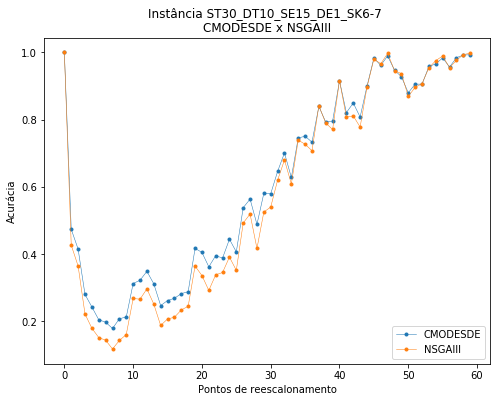

In [440]:
plot_acc(acc_event, inst, algorithms)


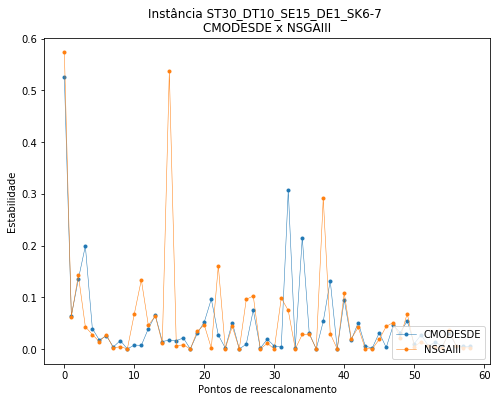

In [441]:
plot_stab(stab_event, inst, algorithms)

In [442]:
stat, p = wilcoxon(*datasets) #friedmanchisquare(*datasets)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')


Statistics=1.000, p=1.714149E-11
Distribuições diferentes (rejeitar H0)


In [443]:
stat, p = wilcoxon(*datasetsAcc) #friedmanchisquare(*datasetsAcc)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=100.000, p=3.119913E-09
Distribuições diferentes (rejeitar H0)


In [444]:
stat, p = wilcoxon(*datasetsStab) #friedmanchisquare(*datasetsStab)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=671.000, p=5.381384E-01
Mesmas distribuições (falhou em rejeitar H0)


In [445]:
df = pd.DataFrame({alg: hv_event[inst][alg].hypervolume for alg in algorithms})
df = df.melt(var_name="algorithm", value_name="hypervolume")
pc = sp.posthoc_conover(df, group_col="algorithm", val_col="hypervolume")
pc

CMODESDE   NSGAIII
CMODESDE -1.00E+00  3.13E-01
NSGAIII   3.13E-01 -1.00E+00

(<matplotlib.axes._subplots.AxesSubplot at 0x7f1c05e53b38>,
 <matplotlib.colorbar.ColorbarBase at 0x7f1c05ec52b0>)

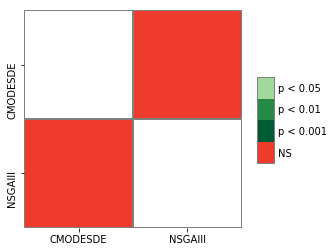

In [446]:
sp.sign_plot(pc, **heatmap_args)